# <h1 align="center">**Financial Signal Processing Coursework Part One**</h1>


<h3 align="center">
  Prof. Danilo P. Mandic
  <br>
XXXNAME
  <br>
  XXXID
</h3>



# **1. Regression Methods**

## **1.1 Processing stock price data in Python**
For the following question, initialise your Python session by importing the following modules:

```python
import numpy as np    # scientific library
import pandas as pd   # data structure library
import matplotlib.pyplot as plt  # plotting library
%matplotlib inline

### **Task 1**
``` python
Import
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/priceData.csv
```
using the following commands:
``` python
px = pd.read_csv("priceData.csv")
```
and perform the natural-log transform of the price
``` python
using logpx = np.log(px).
```
Plot the time-series using logpx.plot().

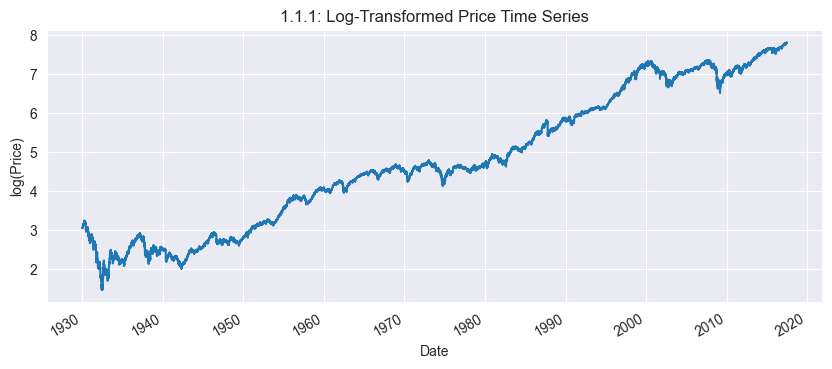

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
df = pd.read_csv("priceData.csv",
                 parse_dates=["date"],
                 dayfirst=True,
                 index_col="date")

# Sort by date ascending just in case
df.sort_index(inplace=True)

# Extract price series
px = df["SPX Index"]

# Compute log-price
logpx = np.log(px)

# Plot log-price
plt.figure(figsize=(10, 4))
logpx.plot()
plt.title("1.1.1: Log-Transformed Price Time Series")
plt.xlabel("Date")
plt.ylabel("log(Price)")
plt.grid(True)
plt.show()

##### Figure 1: Log-Transformed Price Time Series
The chart displays the log-transformed SPX index from roughly 1930 to 2020, showing an overall upward trend with considerable short-term fluctuations. It highlights clear declines during market downturns, yet it also demonstrates robust long-term growth.

### **Task 2**
Using a sliding window of 252 days, compute and store the evolution of the “sliding-window-based” first and [2]
 second-order statistics (mean and variance) of the price and log-price time series, using 1-day increments,
 and plot these as a function of time on separate figures. Comment on the stationarity of price time-series
 with reference to your figures.


 ```python
# sliding mean
plt.figure()
logpx.rolling(252).mean().plot()
plt.show()

# sliding standard deviation
plt.figure()
logpx.rolling(252).std().plot()
plt.show()

##### Figure 2: Rolling Mean of Price
This chart displays the log-transformed SPX index from roughly 1930 to 2020, revealing an overall upward trend with significant short-term fluctuations. It emphasizes notable declines during market downturns while also showcasing robust long-term growth.

##### Figure 3: Rolling Std of Price
The figure also shows the 252-day rolling standard deviation of SPX index prices. In the early decades, volatility (as measured by the standard deviation) was relatively low, but it has increased markedly over time, spiking during significant market events. Because the standard deviation varies considerably across different periods, the second moment of the price series does not exhibit stationarity—a stationary process requires a constant variance, which is clearly not the case with the original price data.

##### Figure 4: Rolling Mean of Log-Price
The chart displays the 252-day rolling mean of the log-transformed SPX index, which appears to be relatively stable over time. This suggests that the first moment of the log-price series is stationary, as the mean remains relatively constant over the entire period.

##### Figure 5: Rolling Std of Log-Price
The figure shows the 252-day rolling standard deviation of log-transformed SPX index prices. The standard deviation of the log-price series is relatively stable over time, indicating that the second moment of the log-price series is stationary. This is in contrast to the original price data, where the standard deviation varied significantly across different periods.


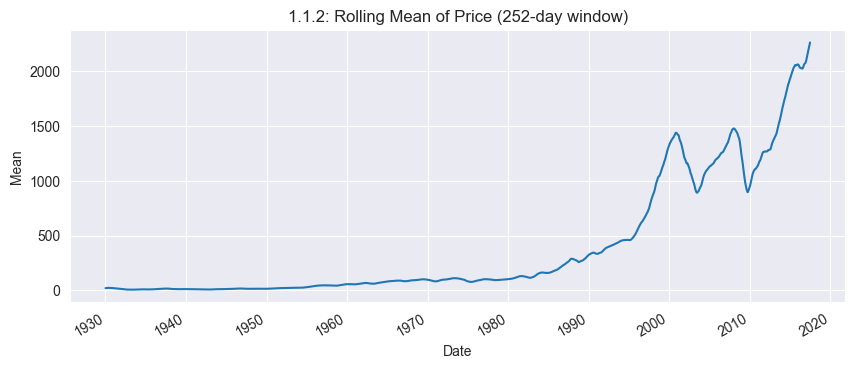

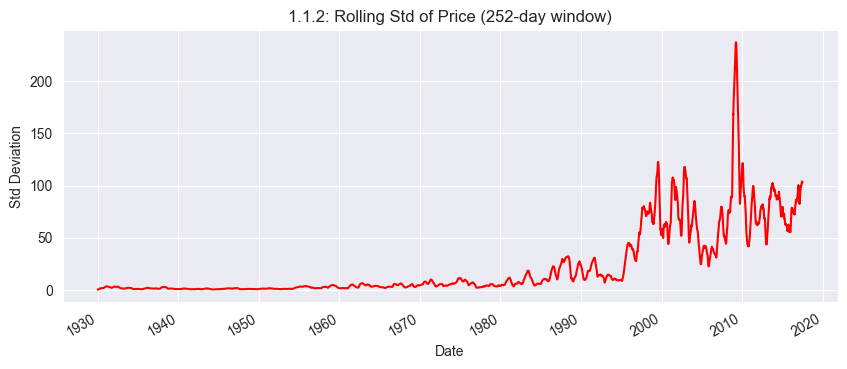

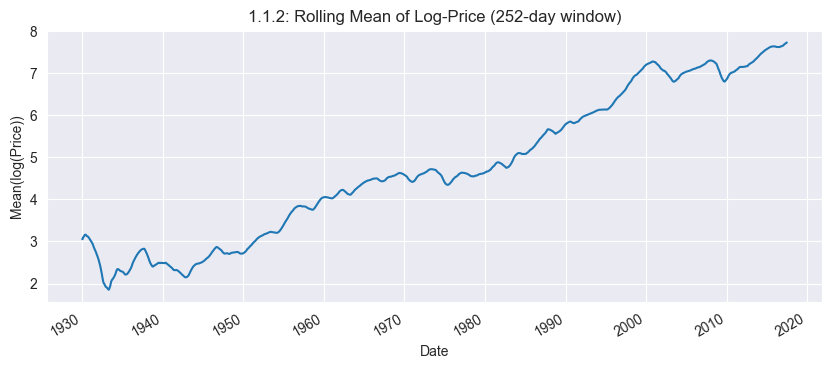

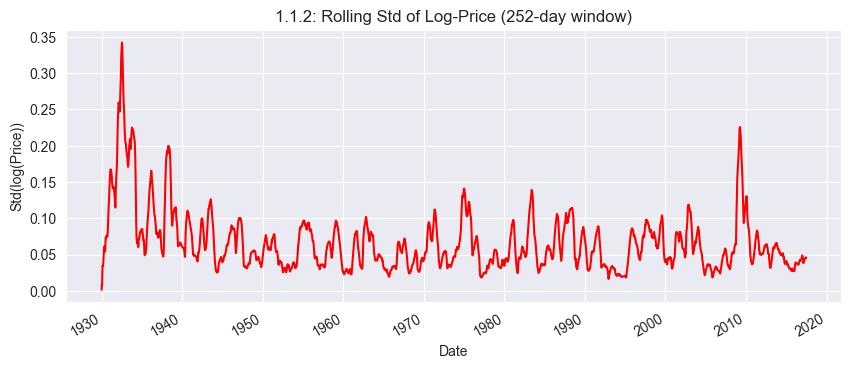

In [5]:
rolling_mean_px = px.rolling(window=252, min_periods=1).mean()
rolling_std_px  = px.rolling(window=252, min_periods=1).std()

rolling_mean_logpx = logpx.rolling(window=252, min_periods=1).mean()
rolling_std_logpx  = logpx.rolling(window=252, min_periods=1).std()

# Plot rolling mean of Price
plt.figure(figsize=(10, 4))
rolling_mean_px.plot()
plt.title("1.1.2: Rolling Mean of Price (252-day window)")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.grid(True)
plt.show()

# Plot rolling std of Price
plt.figure(figsize=(10, 4))
rolling_std_px.plot(color='red')
plt.title("1.1.2: Rolling Std of Price (252-day window)")
plt.xlabel("Date")
plt.ylabel("Std Deviation")
plt.grid(True)
plt.show()

# Plot rolling mean of Log-Price
plt.figure(figsize=(10, 4))
rolling_mean_logpx.plot()
plt.title("1.1.2: Rolling Mean of Log-Price (252-day window)")
plt.xlabel("Date")
plt.ylabel("Mean(log(Price))")
plt.grid(True)
plt.show()

# Plot rolling std of Log-Price
plt.figure(figsize=(10, 4))
rolling_std_logpx.plot(color='red')
plt.title("1.1.2: Rolling Std of Log-Price (252-day window)")
plt.xlabel("Date")
plt.ylabel("Std(log(Price))")
plt.grid(True)
plt.show()



## Task3：
Compute the simple and log return time-series from the price data using the script:

```python
# log return
logret = logpx.diff()

# simple return
simpret = px.pct_change()
```

Based on the Python commands in Question 1.1.1, produce figures of the “sliding” statistics of the obtained time-series and comment on the stationarity of these returns in comparison to the figures obtained in Question 1.1.1.

In [11]:
logret = logpx.diff()
simpret = px.pct_change()

C:\Users\polo_\AppData\Local\Temp\ipykernel_9040\1912314780.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  simpret = px.pct_change()


`logpx` represents the price series after applying the natural logarithm transformation. Consequently, invoking `.diff()` calculates the difference $\ln(p_t) - \ln(p_{t-1})$.

 `px` is the original price series, and `pct_change()` is equivalent to
$\frac{p_t - p_{t-1}}{p_{t-1}}$.


In [12]:
# Rolling mean & variance of log returns
rolling_mean_logret = logret.rolling(window=252, min_periods=1).mean()
rolling_var_logret  = logret.rolling(window=252, min_periods=1).var()

# Rolling mean & variance of simple returns
rolling_mean_simpret = simpret.rolling(window=252, min_periods=1).mean()
rolling_var_simpret  = simpret.rolling(window=252, min_periods=1).var()

Figure 6: Rolling Mean of Log Returns (252-day window)

The Rolling Mean of Price (Task 2) shows a clear upward trend—from near zero in the 1930s to over 2,000 in recent decades—indicating non-stationarity as the average price continually increases. In contrast, the Rolling Mean of Simple Returns (Task 3) remains close to zero over time, with only minor fluctuations (such as spikes in the 1930s). This relative stability suggests that simple returns are much closer to being stationary compared to raw or log-transformed prices.A constant mean in returns better satisfies the stationarity assumptions necessary for effective statistical analysis and forecasting.



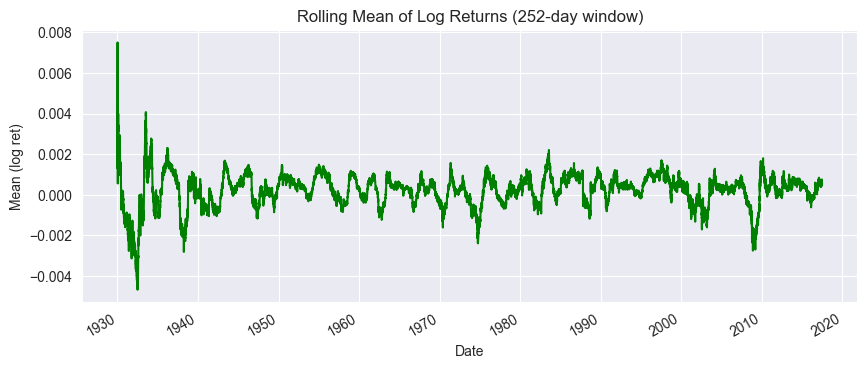

In [13]:

# Plot rolling mean & variance of log returns
plt.figure(figsize=(10, 4))
rolling_mean_logret.plot(color='green')
plt.title("Rolling Mean of Log Returns (252-day window)")
plt.xlabel("Date")
plt.ylabel("Mean (log ret)")
plt.grid(True)
plt.show()

Figure 7: Rolling Variance of Log Returns (252-day window)

Task 2 shows that the rolling standard deviation of raw prices was almost zero in the early period, but it surged from the 1970s and became highly significant by the 2000s. This dramatic increase in volatility over time clearly indicates that the variance of prices is not constant, confirming their non-stationary nature.

In contrast, Task 3 reveals that although the rolling standard deviation of simple returns does fluctuate during periods of market turmoil, it generally remains within a narrow band—typically just a few percentage points—and does not exhibit a long-term upward trend. This suggests that the volatility of simple returns is more stable and aligns better with the constant variance assumption required for stationarity.

Overall, while Task 2 highlights the escalating volatility of raw prices over time, Task 3 demonstrates that simple returns maintain a relatively stable volatility pattern, clearly differentiating the two.


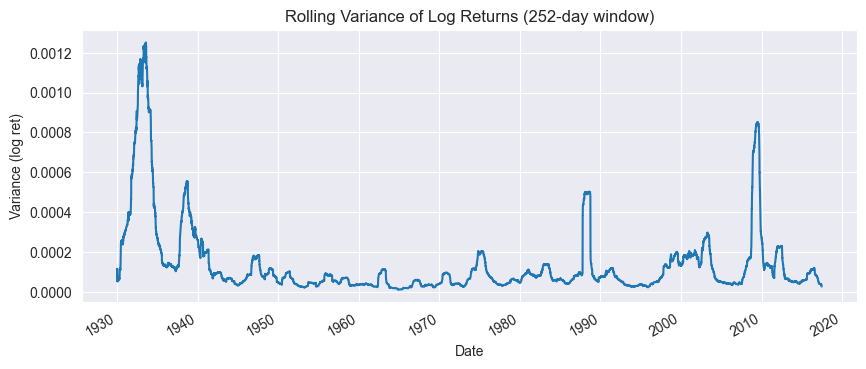

In [14]:

plt.figure(figsize=(10, 4))
rolling_var_logret.plot()
plt.title("Rolling Variance of Log Returns (252-day window)")
plt.xlabel("Date")
plt.ylabel("Variance (log ret)")
plt.grid(True)
plt.show()

Figure 8: Rolling Mean of Simple Returns (252-day window)

**Task 2: Rolling Mean of Log-Price**
This curve starts at approximately 2 in the 1930s and gradually rises to nearly 8 by the 2020s, clearly exhibiting an upward trend. The continual increase in the mean is indicative of non-stationarity, demonstrating that the log-price process does not fluctuate around a fixed average.

**Task 3: Rolling Mean of Log Returns**
In contrast, the 252-day rolling mean of log returns predominantly hovers around zero, showing no significant upward or downward drift. Although occasional spikes occur during periods of intense market volatility, the mean largely remains within a narrow band. A stable mean better aligns with the conditions required for stationarity, even if it does not fully guarantee it.

**Overall Comparison**
In summary, the trend in the rolling mean of log returns is much less pronounced than that of the log-price. This explains why, in the construction of statistical or econometric models, practitioners typically favor using returns over prices, as the former is more likely to meet the stationarity assumptions.

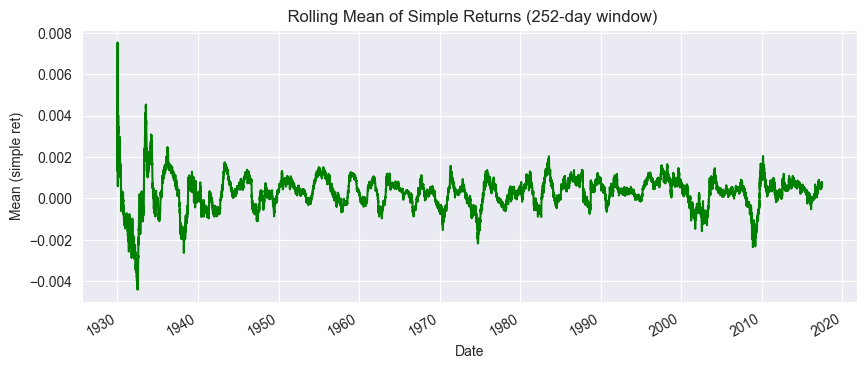

In [15]:

# Plot rolling mean & variance of simple returns
plt.figure(figsize=(10, 4))
rolling_mean_simpret.plot(color='green')
plt.title(" Rolling Mean of Simple Returns (252-day window)")
plt.xlabel("Date")
plt.ylabel("Mean (simple ret)")
plt.grid(True)
plt.show()

### Figure 9: Rolling Variance of Simple Returns (252-day window)

Across a lengthy historical timeline, the rolling standard deviation of raw prices remains nearly negligible in early years, only to surge markedly around 1970 and escalate to extraordinarily high levels in the 2000s, underscoring the non-constant variance characteristic of raw prices and affirming their non-stationary nature. In contrast, although the rolling standard deviation of simple returns also shifts—particularly during market upheavals—it typically stays confined to a relatively narrow band, peaking at only a few percentage points rather than leaping to extreme levels. While these movements do reflect changing market conditions, they lack the sustained upward trajectory observed in raw price volatility. Taken together, simple returns display a more consistent volatility pattern, indicating that even before any log transformation, returns adhere more closely to the constant-variance premise associated with stationarity than raw prices do.



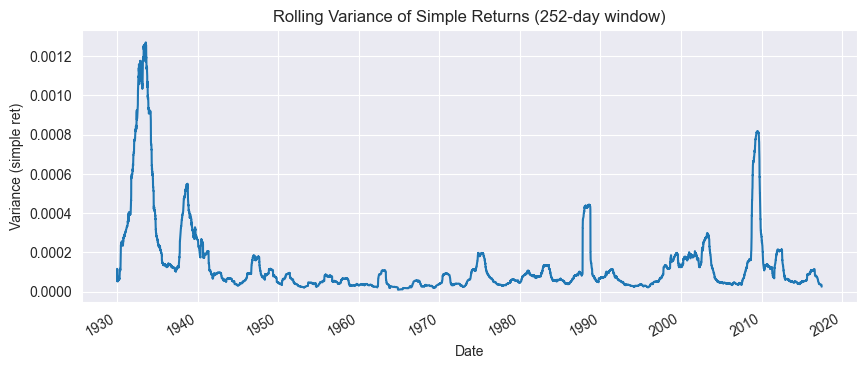

In [16]:

plt.figure(figsize=(10, 4))
rolling_var_simpret.plot()
plt.title("Rolling Variance of Simple Returns (252-day window)")
plt.xlabel("Date")
plt.ylabel("Variance (simple ret)")
plt.grid(True)
plt.show()


## Task4:
Theoretically justify the suitability of log returns over simple returns for signal processing purposes. Next, [3]
 perform the “Jarque-Bera” test for Gaussianity on the data, and comment on the results in light of your
 theoretical answer (hint: use the Python commands provided below).


 ```python
from scipy import stats
# return the Jarque-Bera test p-value for a time-series x
stats.jarque_bera(x)[1]

**Log Return** is often more suitable than **Simple Return** for signal processing and model-building for several reasons:

1. **Stationarity**
   Log returns are typically closer to being “stationary” compared to simple returns. Prices themselves are often non-stationary, but taking the log and then differencing can often yield a process that is more consistent with the stationarity assumption. This makes it easier to apply various time series models based on stationarity (e.g., ARMA/ARIMA, GARCH).

2. **Additivity**
   Log returns are additive over time. If the log return from \(t_1\) to \(t_2\) is \(r_{t_1\to t_2}\) and from \(t_2\) to \(t_3\) is r_{t_2\to t_3}, then the log return from \(t_1\) to \(t_3\) can be directly obtained by summation:
 $r_{t_1 \to t_3} = r_{t_1 \to t_2} + r_{t_2 \to t_3}$

   This property is convenient for long-term forecasting, cumulative return calculations, and operations such as convolution/filtering in signal processing.

3. **Better compatibility with common distributions (e.g., the normal distribution)**
   In financial time series, returns are often assumed (or approximated) to be normally distributed, whereas raw prices very rarely satisfy a normal distribution assumption. When we take the logarithm of prices and work with log returns, the resulting distribution is more likely to be approximately normal (though in real markets “fat tails” often still exist). Nonetheless, log returns tend to be closer to a symmetric distribution than simple returns.

For these reasons, log returns are generally preferred in most quantitative research and signal processing scenarios.

In [17]:
# Perform Jarque-Bera tests
logret_clean = logret.dropna()
simpret_clean = simpret.dropna()

jb_stat_log, jb_p_log = stats.jarque_bera(logret_clean)
jb_stat_simp, jb_p_simp = stats.jarque_bera(simpret_clean)

print("1.1.4: Jarque-Bera test for log returns:")
print("   JB Statistic =", jb_stat_log, "   p-value =", jb_p_log, "\n")

print("1.1.4: Jarque-Bera test for simple returns:")
print("   JB Statistic =", jb_stat_simp, "   p-value =", jb_p_simp, "\n")



1.1.4: Jarque-Bera test for log returns:
   JB Statistic = 311807.27048989857    p-value = 0.0 

1.1.4: Jarque-Bera test for simple returns:
   JB Statistic = 284160.67730312835    p-value = 0.0 



## Task5:

You
purchase
a
stock
for £1. The next day its value goes up to £2 and the following day back to £1.[1]
Whatare
the
simple and logarithmic
returns
over
this
period and what
can
you
conclude
about
logarithmic
returns on the basis of this example?

**Overall price change:** From Day 1 (£1) to Day 3 (£1), there is ultimately no net change, returning to the initial price.

**Sum of simple returns:** 100% + (−50%) = 50%. This is misleading because it suggests a combined return of +50% over the two days, even though the price returns to £1. Moving from £1 back to £1 should indicate a total change of 0%.

**Sum of log returns:** ln(2) + ln(0.5) = 0.6931 + (−0.6931) = 0. This matches the actual price behavior: since the final price returns to the initial price, the sum of the two log returns is 0, accurately reflecting a net price change of 0.

In other words, **the sum of simple returns does not equal the overall simple return** (i.e., simple returns are not additive), whereas **the sum of log returns is theoretically equivalent to the total return** (because ln(a) + ln(b) = ln(a b)), demonstrating the additive property of log returns.

In [48]:
p0, p1, p2 = 1.0, 2.0, 1.0
simple_ret_1 = (p1 - p0) / p0  # +100%
simple_ret_2 = (p2 - p1) / p1  # -50%

log_ret_1 = np.log(p1) - np.log(p0)   # ln(2)
log_ret_2 = np.log(p2) - np.log(p1)   # ln(1/2) = -ln(2)

# Summations
total_simple = (1 + simple_ret_1)*(1 + simple_ret_2) - 1
total_log = log_ret_1 + log_ret_2

print("1.1.5: Example 1 -> 2 -> 1")
print("   Simple returns per day: ", simple_ret_1, ", ", simple_ret_2)
print("   Log returns per day: ", log_ret_1, ", ", log_ret_2)
print("   Total simple return over two days = ", total_simple)
print("   Total log return over two days = ", total_log, "\n")

1.1.5: Example 1 -> 2 -> 1
   Simple returns per day:  1.0 ,  -0.5
   Log returns per day:  0.6931471805599453 ,  -0.6931471805599453
   Total simple return over two days =  0.0
   Total log return over two days =  0.0 



## Task6:

 Under what circumstances should you not use log returns over simple returns?

**Answer:**
Although log returns are often preferred in many quantitative finance and signal processing scenarios, they are not always the best choice. Here are a few considerations:

When price changes are extremely large or prices approach zero
If price fluctuations are extremely large (for instance, going from 1 all the way down to almost 0, or from 1 soaring to hundreds of times its original value), log returns can become extremely large or even approach infinity (and are undefined if the price reaches 0). In some markets (for example, when an option expires worthless), the price can indeed approach or become zero, and in that case, log returns cannot be applied while simple returns can still be calculated.

When trading activities focus on actual percentage gains or losses
Sometimes investors are directly concerned with “I invested 1 unit, it increased by 10%, then another 10%, so my investment went from 1 to 1.21”—using the concept of compounding to analyze returns. In these situations, simple returns are more intuitive. If the goal is to track “pure percentage change in each period” rather than relying on the additive property of logs, then simple returns may be easier for investors to understand.

Accounting/financial statements
In practical financial decision-making or accounting statements, performance or cost calculations often directly use “the increase or decrease this period compared to the previous period.”

Overall, when you care about long-term (multi-period) returns and want a return measure that is mathematically additive, log returns are generally the better choice. However, if prices undergo multiple surges and crashes, approach zero, or other special scenarios arise, defining and interpreting log returns becomes difficult. In those situations, simple returns or other return measures may be more suitable.

## **1.2 ARMA vs. ARIMA Models for Financial Applications**
For this question you will need to import the following Python packages via:

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
import copy
```


An **autoregressive-moving-average** process, **ARMA $(p, q)$**, is a stochastic process $\{x[t]\}$, composed of both:

- An **AR** part that regresses the variable $x[t]$ on its own lagged values, $x[t-1], \dots, x[t-p]$.
- An **MA** part which models the error term as a linear combination of error terms at various times in the past, $y[t-1], \dots, y[t-q]$.

In other words, the **ARMA $(p, q)$** model takes the form:

$
x[t] = \sum_{i=1}^{p} a_i\, x[t - i] \;+\; \sum_{i=1}^{q} b_i\, \eta[t - i] \;+\; \eta[t] \quad (1)
$

 The **ARMA** models are widely used in finance, as

- **AR $(p)$**: the autoregressive component aims to explain the momentum and mean reversion effects often observed in trading markets (effects due to the participants).
- **MA $(q)$**: the moving average component attempts to capture shock effects (white noise) often caused by unexpected events (e.g., wars, news, etc.).

All ARMA models assume **stationarity** of data. When sources of non-stationarity are present (e.g., trends), the ARMA model in its original form may not be suitable for analysis.

### **Task 1**

```python
Import
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/snp_500_2015_2019.csv
 ```

 containing closing prices of the **S&P** 500 over the last 4 years and take the log of the data using the following script:

```python
snp = pd.read_csv('snp_500_2015_2019.csv')
snp.set_index(['Date'], inplace=True)
snp_close = snp['Close'].to_frame().apply(np.log)
```
Plot the **S&P** 500 time-series. Following the process in Question $1.1.1$, comment on whether an **ARMA** or **ARIMA** model would be more appropriate.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AR
import copy
import requests
from io import StringIO
from statsmodels.tsa.stattools import adfuller

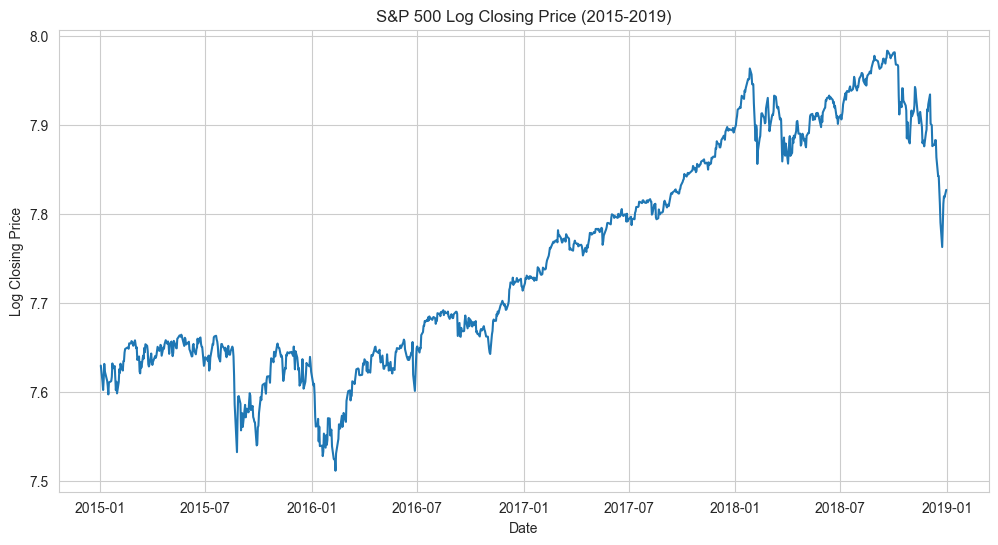

In [2]:
url = "http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/snp_500_2015_2019.csv"
response = requests.get(url)
data = StringIO(response.text)
snp = pd.read_csv(data)
snp.set_index(['Date'], inplace=True)
snp_close = snp['Close'].to_frame().apply(np.log)
snp_close.index = pd.to_datetime(snp_close.index)
plt.figure(figsize=(12, 6))
plt.plot(snp_close)
plt.title('S&P 500 Log Closing Price (2015-2019)')
plt.xlabel('Date')
plt.ylabel('Log Closing Price')
plt.grid(True)
plt.show()

# Analysis of S&P 500 Logarithmic Closing Prices

By observing the graph of the S&P 500's logarithmic closing prices from 2015-2019, it's evident that the data exhibits an upward trend. This indicates that the long-term mean of the sequence is not constant but continuously increases over time, showing significant trend characteristics. Therefore, this data does not meet the assumption of stationarity.

**Key Observations:**

* **Upward Trend:** The data clearly shows a consistent increase over time.
* **Non-Constant Mean:** The long-term average of the sequence is not stable; it's rising.
* **Trend Characteristics:** The data displays a strong trend, indicative of a non-stationary process.
* **Violation of Stationarity:** The data fails to meet the requirements of stationarity, which assumes constant statistical properties over time.

Original Series ADF Statistic: -1.2138759368829228
p-value: 0.6675983326694177
Critical Values: {'1%': -3.4368734638130847, '5%': -2.8644201518188126, '10%': -2.5683035273879358}

Differenced Series ADF Statistic: -23.737857864598467
p-value: 0.0
Critical Values: {'1%': -3.436886505235454, '5%': -2.8644259034265493, '10%': -2.568306590825728}


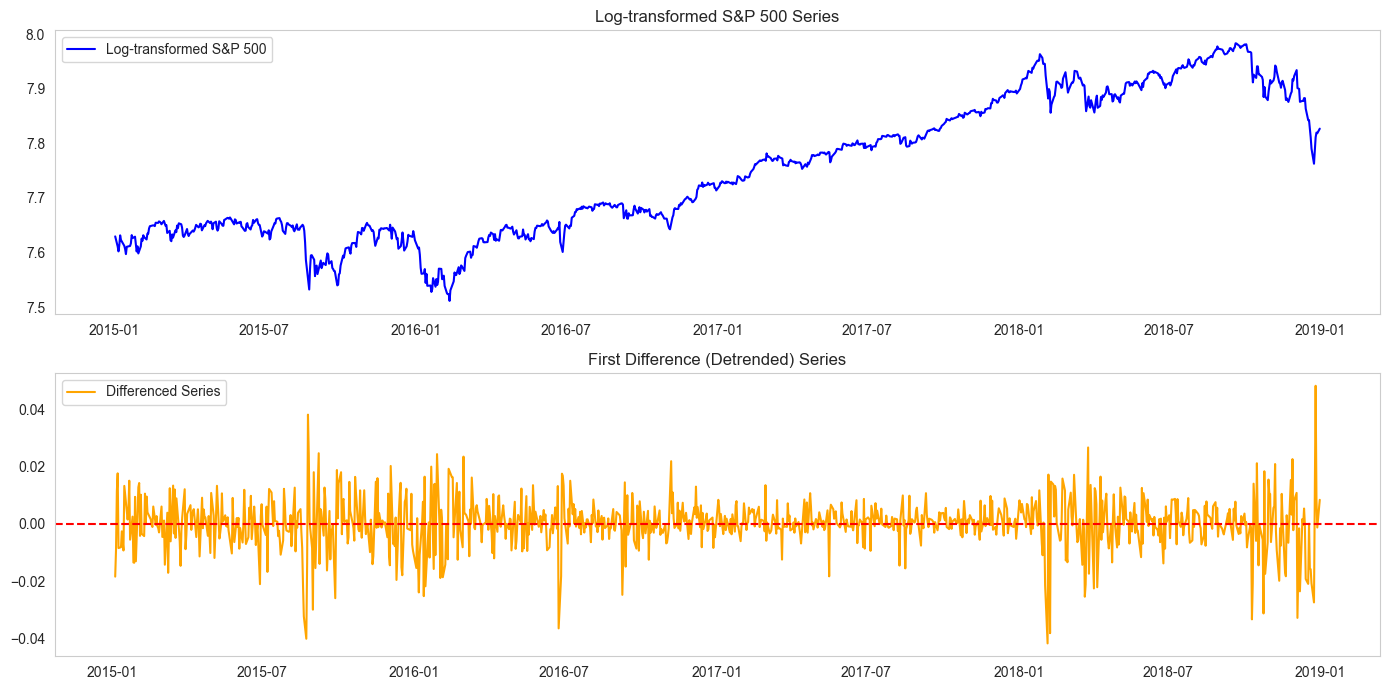

In [3]:

adf_result_original = adfuller(snp_close['Close'])
print("Original Series ADF Statistic:", adf_result_original[0])
print("p-value:", adf_result_original[1])
print("Critical Values:", adf_result_original[4])

diff_snp_close = snp_close.diff().dropna()
adf_result_diff = adfuller(diff_snp_close['Close'])
print("\nDifferenced Series ADF Statistic:", adf_result_diff[0])
print("p-value:", adf_result_diff[1])
print("Critical Values:", adf_result_diff[4])

plt.figure(figsize=(14, 7))

plt.subplot(2,1,1)
plt.plot(snp_close, color='blue', label='Log-transformed S&P 500')
plt.title('Log-transformed S&P 500 Series')
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(diff_snp_close, color='orange', label='Differenced Series')
plt.title('First Difference (Detrended) Series')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## Stationarity Test on the Original Data

The stationarity test was performed on the original time series data, and the results indicate that the data is non-stationary. The ADF test statistic is **-1.2139**, which is significantly greater than all critical values (in absolute terms), and the **p-value is 0.668**, far above the commonly used significance levels (**0.05 or 0.01**).

Therefore, the null hypothesis cannot be rejected, implying the presence of a **unit root**, which indicates a trend in the data and makes it unsuitable for direct **ARMA modeling**.

After applying **first-order differencing** and performing the ADF test again, the test statistic is **-23.74**, which is far below all critical values, and the **p-value is close to 0**, strongly rejecting the null hypothesis. This indicates that the **differenced data has become a stationary series**.

Thus, the first-order differencing successfully removed the **trend component** in the original data, making it suitable for **ARMA modeling**. Therefore, an **ARIMA model** should be used in this case.

## Application of ARMA and ARIMA Models to Non-Stationary Data

From a mathematical perspective:

- **ARMA model:**
  $$
  x[t] = \sum_{i=1}^{p} a_i x[t-i] + \sum_{i=1}^{q} b_i \eta[t-i] + \eta[t]
  $$

- **ARIMA model:**
  $$
  \Delta x[t] = \sum_{i=1}^{p} a_i \Delta x[t-i] + \sum_{i=1}^{q} b_i \eta[t-i] + \eta[t]
  $$

Thus, ARIMA essentially transforms non-stationary data into stationary data before applying the ARMA model for processing.

### **Task 2**

Fit an **ARMA(1,0)** model using the commands below

```python
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
snp_arma['Res'] = ARIMA(snp_arma, order=(1,0,0)).fit().resid
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']
```

Plot, in the same figure, both the prediction and the true signal.
Inspect the model parameters (`model.params`).
Comment on the results. Are these findings useful in practice?

In [4]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", message="A date index has been provided")
snp_close = snp_close.asfreq('B')
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']

model = ARIMA(snp_arma['True'], order=(1,0,0)).fit()
snp_arma['Res'] = model.resid
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']

First, the above lines of code need to be explained: In this example, a simple AR(1,0,0) model is fitted. Subsequently, the model residuals (actual data minus model predicted values) are obtained. Finally, the predicted values are derived by subtracting the residuals from the actual values.

const     7.748867
ar.L1     0.997354
sigma2    0.000072
dtype: float64


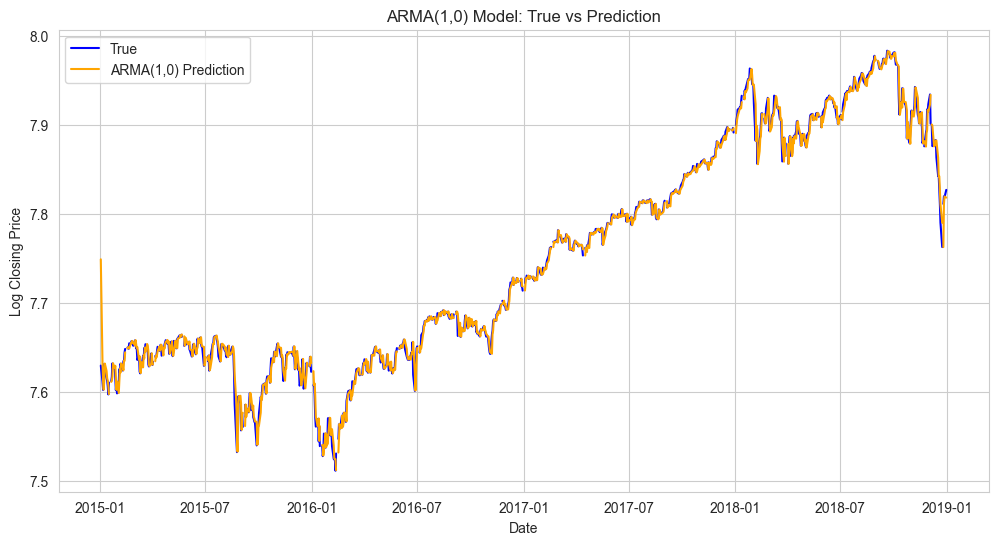

In [5]:
print(model.params)
plt.figure(figsize=(12,6))
plt.plot(snp_arma['True'], label='True', color='blue')
plt.plot(snp_arma['Prediction'], label='ARMA(1,0) Prediction', color='orange')
plt.title('ARMA(1,0) Model: True vs Prediction')
plt.xlabel('Date')
plt.ylabel('Log Closing Price')
plt.legend()
plt.grid(True)
plt.show()

### Model Parameter Analysis

The parameters of the **ARMA(1,0)** model are as follows:

- **const = 7.748867**: This is the constant term, representing the long-term central position (on a logarithmic scale).
- **ar.L1 = 0.997354**: The AR(1) coefficient, which is extremely close to 1.
- **sigma² = 0.000072**: The variance of the model residuals, which is quite small, indicating an apparently good fit.

A key parameter here is **ar.L1 = 0.997354**, which suggests a very strong positive correlation between the current value and the previous value. This is close to a **random walk process**, further confirming the **non-stationary** nature of the data.

**Mathematical Formula**

 AR(1) Model:
$$
x[t] = \text{const} + a_1 x[t-1] + \eta[t]
$$

Based on the given model parameters:

- **\( a_1 = 0.997354 \)**: This value is very close to 1.
- When **( a_1 = 1 )**, the equation simplifies to a **random walk model**:

  $$
  x[t] = \text{const} + x[t-1] + \eta[t]
  $$

**Implications of a Random Walk**
- A **random walk** implies that the **mean of the series changes over time**, and the **variance increases linearly** with time, leading to clear **non-stationary characteristics** (trend growth).
- In practice, an **AR(1) model with a coefficient close to 1** essentially approximates a **trending sequence**, making it **unsuitable for long-term stable forecasting**.


### Image Analysis (Predictions vs. Actual Values)

The overall fitting performance appears to be good, as the predicted values (orange) closely match the actual data (blue).

However, it is important to note that this result does not represent true long-term forecasting. Instead, it is based on a **one-step-ahead prediction** using the entire historical dataset (fitting in training).

In real-world long-term forecasting, **trend issues** can lead to cumulative errors, causing the predictions to gradually deviate from the actual values.

### Practical Significance Analysis

- **Stock indices or prices** often exhibit strong trend characteristics, following a **random walk** or an **approximate random walk**. An **AR(1) coefficient close to 1** reflects the market's **trend persistence and momentum behavior**:
  - An **AR(1) coefficient very close to 1** indicates strong market momentum: if prices rise today, they are likely to continue rising tomorrow (though trends may gradually shift over time).

- However, applying an **ARMA(1,0) model** directly implies:
  - The model can only fit short-term movements and struggles to capture **long-term trend changes** effectively.
  - From a **financial forecasting perspective**, while this model may appear accurate in the short term, its **long-term predictive value is limited** due to **error accumulation**, which significantly reduces forecasting accuracy over time.

An **ARIMA(pdq)** model is essentially the same as **ARMA**, with the exception that it applies an initial differencing on the time-series in hand to remove sources of non-stationarity, where **d** is the differencing order.

### **Task 3*

Repeat Question **1.2.2**, this time by fitting an **ARIMA(110)** model. Comment on the results. Compare [10] your results with those in Question **1.2.2**. Which analysis is more physically meaningful

ar.L1     0.040712
sigma2    0.000072
dtype: float64


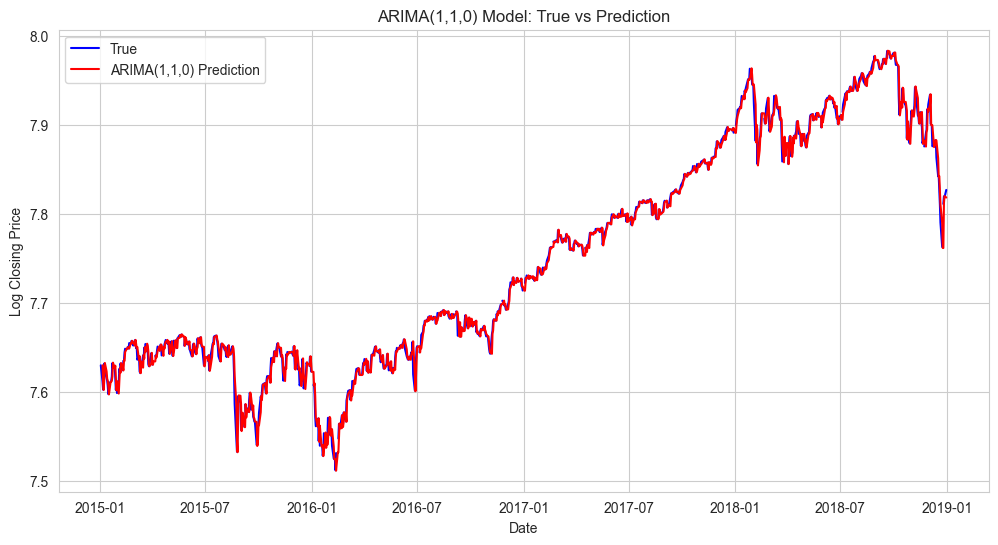

In [6]:
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ["True"]

model_arima = ARIMA(snp_arima["True"], order=(1,1,0)).fit()
snp_arima['Prediction'] = model_arima.predict(start=1, end=len(snp_arima)-1)
# Due to the presence of differencing in the ARIMA(1,1,0) model, I utilize the built-in `predict()` function to generate the predicted values.
print(model_arima.params)
plt.figure(figsize=(12,6))
plt.plot(snp_arima['True'], label='True', color='blue')
plt.plot(snp_arima['Prediction'], label='ARIMA(1,1,0) Prediction', color='red')
plt.title('ARIMA(1,1,0) Model: True vs Prediction')
plt.xlabel('Date')
plt.ylabel('Log Closing Price')
plt.legend()
plt.grid(True)
plt.show()

### **Model Parameter Analysis (ARIMA(1,1,0))**

The parameters of the fitted **ARIMA(1,1,0)** model are:

- **ar.L1 = 0.040712**:
  This parameter indicates a very weak correlation between successive changes (first differences) in the data. The value (**0.0407**) is significantly smaller than 1, showing that the differenced series has minimal dependence on its immediate past value. Such a small coefficient indicates that the differenced series is now **stationary**, having effectively removed the original data's **non-stationary trend**.

- **sigma² = 0.000072**:
  This residual variance remains small, indicating that after differencing, the **AR(1) model** captures the remaining structure effectively, leaving minimal unexplained variance.

From the parameters obtained in the **ARIMA(1,1,0)** model, we can observe that **ar.L1 = 0.040712**. Compared to the previous **ARMA(1,0) model's parameter (0.997354)**, this value is significantly smaller and much closer to **0**. This clearly indicates that differencing has successfully eliminated the strong trend in the data.

- **Mathematically, the ARIMA(1,1,0) model is represented as:**
  - $$
    \Delta x[t] = a_1 \Delta x[t-1] + \eta[t]
    $$
  - Where **\( a_1 = 0.040712 \)**, which is very close to zero. This suggests that after differencing, there is almost **no persistence or momentum** in the data.
    In other words, the differenced series closely resembles **white noise**, meaning the **long-term trend has been successfully removed**.

- In contrast, the previously fitted **ARMA(1,0) model** had an **AR parameter close to 1 (0.997354)**, indicating that it was essentially approximating a **random walk**:
  - $$
    x[t] \approx x[t-1] + \eta[t]
    $$
  - This confirms that **ARMA(1,0) is unsuitable for directly modeling data with clear non-stationarity**.

### **Image Analysis (Predictions vs. Actual Values)**

The predicted values from the **ARIMA(1,1,0) model** (red curve) closely follow the actual data (blue curve). It effectively captures **local short-term movements**, indicating that short-term variations are accurately represented. Visually, from both images, the **fit appears satisfactory**, with the predicted values closely tracking the actual values and responding well to changes. However, despite this, based on the previous analysis and the parameters of the **ARIMA(1,1,0) model**, it can be confirmed that **ARIMA(1,1,0)**, due to the inclusion of the differencing step, effectively eliminates long-term trends, making the predictions more **stable and reliable**.


### **Conclusion**

- Since the **ARIMA(1,1,0) model** explicitly acknowledges and correctly handles the **non-stationary (trending) nature** of financial data, its analysis is **more practically meaningful**.
- By applying **differencing**, it effectively captures **short-term fluctuations** while isolating the **underlying trend**, providing a **more robust and realistic** model for financial data.
- This makes it **valuable** for real-world forecasting applications.

### **Task 4**
##### Comment on the necessity of taking the log of the prices for the **ARIMA** analysis.
### **Mathematical (Statistical) Perspective**

Financial data often exhibits **nonlinear growth trends**, typically following **exponential growth**. For example, stock or index prices generally increase exponentially over time:

$$
X_t \approx X_0 e^{rt}
$$

- **Log transformation** converts **exponential growth** into **linear growth**:

  $$
  \log(X_t) = \log(X_0 e^{rt}) = \log(X_0) + rt
  $$

- After applying the **log transformation**, the **exponential growth trend** becomes **linear**:

  $$
  \text{Nonlinear exponential trend} \quad \rightarrow \quad \text{Linear trend}
  $$

This transformation allows **ARIMA (a linear model)** to more accurately and effectively capture the **fundamental characteristics** of the data.

### **Financial Perspective**

**Log Differencing:**
$$
y_t - y_{t-1} = \log(x_t) - \log(x_{t-1}) = \log\left(\frac{x_t}{x_{t-1}}\right) \approx \frac{x_t - x_{t-1}}{x_{t-1}}
$$

- **Log differencing** is essentially equivalent to **returns**, eliminating **heteroscedasticity** caused by increasing price levels over time, making the series more stable.
- More importantly, **price series** often exhibit **exponential growth trends** (e.g., stock markets). Applying the **log transformation** effectively **converts exponential growth into a linear trend**, making it more suitable for linear models such as **ARIMA**.

### **Enhanced Data Stability**

Log transformation helps **reduce data volatility** (lower variance), making linear patterns more apparent. It acts as a **penalization mechanism**, where **larger values** receive a **greater penalty**, while **smaller values** are penalized less.
This transformation enhances stability and makes the data more suitable for analysis with **linear models**.
Assuming the original price series is **\( x_t \)**, applying the log transformation gives:

$$
y_t = \log(x_t)
$$

The log transformation **compresses the scale of the data**:

- When **\( x_t \)** is large, the data is **significantly compressed**.
- When **\( x_t \)** is small, the compression effect is **relatively minor**.

From a **mathematical**, **financial**, and **data stability**perspective, applying a **log transformation** to price data is both **necessary and effective**. For the application of ARIMA model, logarithmic transformation is an essential processing step, which can significantly improve the accuracy of prediction and the rationality of the model.


## **1.3 Vector Autoregressive (VAR) Models**
Now, consider a multivariate extension of the **AR** processes, the so-called **VAR(p)** process, given by:

$
y_t \;=\; c \;+\; A_1\,y_{t-1} \;+\; A_2\,y_{t-2} \;+\;\dots\;+\; A_p\,y_{t-p} \;+\; e_t
\quad (2)
$

or, in an expanded matrix notation,

$$
\begin{pmatrix}
y_{1,t}\\
y_{2,t}\\
\vdots\\
y_{k,t}
\end{pmatrix}
=
\begin{pmatrix}
c_1\\
c_2\\
\vdots\\
c_k
\end{pmatrix}
+
\begin{pmatrix}
a^1_{1,1} & a^1_{1,2} & \cdots & a^1_{1,k}\\
a^1_{2,1} & a^1_{2,2} & \cdots & a^1_{2,k}\\
\vdots & \vdots & \ddots & \vdots\\
a^1_{k,1} & a^1_{k,2} & \cdots & a^1_{k,k}
\end{pmatrix}
\begin{pmatrix}
y_{1,t-1}\\
y_{2,t-1}\\
\vdots\\
y_{k,t-1}
\end{pmatrix}
+ \cdots +
\begin{pmatrix}
a^p_{1,1} & a^p_{1,2} & \cdots & a^p_{1,k}\\
a^p_{2,1} & a^p_{2,2} & \cdots & a^p_{2,k}\\
\vdots & \vdots & \ddots & \vdots\\
a^p_{k,1} & a^p_{k,2} & \cdots & a^p_{k,k}
\end{pmatrix}
\begin{pmatrix}
y_{1,t-p}\\
y_{2,t-p}\\
\vdots\\
y_{k,t-p}
\end{pmatrix}
+
\begin{pmatrix}
e_{1,t}\\
e_{2,t}\\
\vdots\\
e_{k,t}
\end{pmatrix}.
\quad (3)
$$


### **Task 1**
Show how Equations (2)-(3) can be represented in a concise matrix form as follows:

$
Y = BZ + U
\quad
$

where $Y \in \mathbb{R}^{k \times T}$, $B \in \mathbb{R}^{k \times (kP+1)}$, $Z \in \mathbb{R}^{(kP+1)\times T}$, and $U \in \mathbb{R}^{k \times T}$.  *(Hint: let $B = [\, c \quad A_1 \quad A_2 \; \dots \; A_p ]$.)*


### Step 1: Define matrix $\mathbf{Y}$

Matrix $\mathbf{Y}$ contains all observations for all $K$ variables across all time periods from $1$ to $T$:

$$\mathbf{Y} = \begin{bmatrix}
y_{1,1} & y_{1,2} & \cdots & y_{1,T} \\
y_{2,1} & y_{2,2} & \cdots & y_{2,T} \\
\vdots & \vdots & \ddots & \vdots \\
y_{K,1} & y_{K,2} & \cdots & y_{K,T}
\end{bmatrix} \in \mathbb{R}^{K \times T}$$

Where $y_{i,t}$ represents the value of the $i$-th variable at time $t$.

### Step 2: Define matrix $\mathbf{Z}$

Matrix $\mathbf{Z}$ contains all explanatory variables (constant term and lagged values):

$$\mathbf{Z} = \begin{bmatrix}
1 & 1 & \cdots & 1 \\
\mathbf{y}_{0}' & \mathbf{y}_{1}' & \cdots & \mathbf{y}_{T-1}' \\
\mathbf{y}_{-1}' & \mathbf{y}_{0}' & \cdots & \mathbf{y}_{T-2}' \\
\vdots & \vdots & \ddots & \vdots \\
\mathbf{y}_{1-p}' & \mathbf{y}_{2-p}' & \cdots & \mathbf{y}_{T-p}'
\end{bmatrix} \in \mathbb{R}^{(KP+1) \times T}$$

Where:
- The first row consists of ones for the constant term
- Each subsequent block of $K$ rows contains the lagged values of all variables
- $\mathbf{y}_{t}' = [y_{1,t}, y_{2,t}, \ldots, y_{K,t}]$ is the transpose of $\mathbf{y}_t$

More explicitly, we can write:

$$\mathbf{Z} = \begin{bmatrix}
1 & 1 & \cdots & 1 \\
y_{1,0} & y_{1,1} & \cdots & y_{1,T-1} \\
y_{2,0} & y_{2,1} & \cdots & y_{2,T-1} \\
\vdots & \vdots & \ddots & \vdots \\
y_{K,0} & y_{K,1} & \cdots & y_{K,T-1} \\
y_{1,-1} & y_{1,0} & \cdots & y_{1,T-2} \\
y_{2,-1} & y_{2,0} & \cdots & y_{2,T-2} \\
\vdots & \vdots & \ddots & \vdots \\
y_{K,1-p} & y_{K,2-p} & \cdots & y_{K,T-p}
\end{bmatrix}$$

This matrix has dimensions $(KP+1) \times T$ because:
- We have 1 row for the constant term
- We have $K$ rows for each of the $p$ lags
- Total: $1 + K \times p = KP + 1$ rows
- We have $T$ columns, one for each time period

### Step 3: Define coefficient matrix $\mathbf{B}$

Matrix $\mathbf{B}$ contains all the coefficients:

$$\mathbf{B} = \begin{bmatrix}
\mathbf{c} & \mathbf{A}_1 & \mathbf{A}_2 & \cdots & \mathbf{A}_p
\end{bmatrix} \in \mathbb{R}^{K \times (KP+1)}$$

To be more explicit, if we expand this matrix:

$$\mathbf{B} = \begin{bmatrix}
c_1 & a^1_{1,1} & a^1_{1,2} & \cdots & a^1_{1,K} & a^2_{1,1} & \cdots & a^p_{1,K} \\
c_2 & a^1_{2,1} & a^1_{2,2} & \cdots & a^1_{2,K} & a^2_{2,1} & \cdots & a^p_{2,K} \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
c_K & a^1_{K,1} & a^1_{K,2} & \cdots & a^1_{K,K} & a^2_{K,1} & \cdots & a^p_{K,K}
\end{bmatrix}$$

Where:
- $c_i$ is the $i$-th element of the constant vector $\mathbf{c}$
- $a^j_{i,k}$ is the $(i,k)$-th element of matrix $\mathbf{A}_j$

### Step 4: Define error matrix $\mathbf{U}$

Matrix $\mathbf{U}$ contains all the error terms:

$$\mathbf{U} = \begin{bmatrix}
e_{1,1} & e_{1,2} & \cdots & e_{1,T} \\
e_{2,1} & e_{2,2} & \cdots & e_{2,T} \\
\vdots & \vdots & \ddots & \vdots \\
e_{K,1} & e_{K,2} & \cdots & e_{K,T}
\end{bmatrix} \in \mathbb{R}^{K \times T}$$

### Step 5: Verify the matrix equation $\mathbf{Y = BZ + U}$

With these definitions, we can now verify that $\mathbf{Y = BZ + U}$ correctly represents the VAR(p) process.

When we multiply $\mathbf{B}$ and $\mathbf{Z}$, we get:

$$\mathbf{BZ} = \begin{bmatrix}
\mathbf{c} & \mathbf{A}_1 & \mathbf{A}_2 & \cdots & \mathbf{A}_p
\end{bmatrix} \begin{bmatrix}
1 & 1 & \cdots & 1 \\
\mathbf{y}_{0}' & \mathbf{y}_{1}' & \cdots & \mathbf{y}_{T-1}' \\
\mathbf{y}_{-1}' & \mathbf{y}_{0}' & \cdots & \mathbf{y}_{T-2}' \\
\vdots & \vdots & \ddots & \vdots \\
\mathbf{y}_{1-p}' & \mathbf{y}_{2-p}' & \cdots & \mathbf{y}_{T-p}'
\end{bmatrix}$$

For each column $t$ of this product, we get:

$$(\mathbf{BZ})_{:,t} = \mathbf{c} \cdot 1 + \mathbf{A}_1 \mathbf{y}_{t-1} + \mathbf{A}_2 \mathbf{y}_{t-2} + \cdots + \mathbf{A}_p \mathbf{y}_{t-p}$$

Which is exactly the right-hand side of equation (2) without the error term.

Therefore, $\mathbf{Y = BZ + U}$ is indeed the concise matrix form of equations (2)-(3), with each matrix having the dimensions specified in equation (4):
- $\mathbf{Y} \in \mathbb{R}^{K \times T}$
- $\mathbf{B} \in \mathbb{R}^{K \times (KP+1)}$
- $\mathbf{Z} \in \mathbb{R}^{(KP+1) \times T}$
- $\mathbf{U} \in \mathbb{R}^{K \times T}$

And as indicated in the hint, $\mathbf{B} = [\mathbf{c} \quad \mathbf{A}_1 \quad \mathbf{A}_2 \cdots \mathbf{A}_p]$.



----------------------------------------------------

### **Task 2**

Hence, show that the optimal set of coefficients $B$, denoted by $B_{\mathrm{opt}}$, is obtained via:

$
B_{\mathrm{opt}} = YZ^T \; (ZZ^T)^{-1}
\quad
$

Show the whole derivation for full marks.

### Step 1: Define the objective function

We want to minimize the squared Frobenius norm of the error matrix:

$$\min_{\mathbf{B}} \| \mathbf{Y - BZ} \|_F^2$$

Where $\| \cdot \|_F$ denotes the Frobenius norm.

### Step 2: Expand the Frobenius norm

The Frobenius norm squared can be written as:

$$\| \mathbf{Y - BZ} \|_F^2 = \text{Tr}[(\mathbf{Y - BZ})(\mathbf{Y - BZ})^T]$$

Where $\text{Tr}[\cdot]$ denotes the trace of a matrix.

Expanding this expression:

$$\| \mathbf{Y - BZ} \|_F^2 = \text{Tr}[\mathbf{Y}\mathbf{Y}^T - \mathbf{Y}\mathbf{Z}^T\mathbf{B}^T - \mathbf{B}\mathbf{Z}\mathbf{Y}^T + \mathbf{B}\mathbf{Z}\mathbf{Z}^T\mathbf{B}^T]$$

Using the properties of the trace:
- $\text{Tr}[\mathbf{AB}] = \text{Tr}[\mathbf{BA}]$ for conformable matrices
- $\text{Tr}[\mathbf{A} + \mathbf{B}] = \text{Tr}[\mathbf{A}] + \text{Tr}[\mathbf{B}]$
- $\text{Tr}[\mathbf{A}^T] = \text{Tr}[\mathbf{A}]$

We can simplify:

$$\| \mathbf{Y - BZ} \|_F^2 = \text{Tr}[\mathbf{Y}\mathbf{Y}^T] - \text{Tr}[\mathbf{Y}\mathbf{Z}^T\mathbf{B}^T] - \text{Tr}[\mathbf{B}\mathbf{Z}\mathbf{Y}^T] + \text{Tr}[\mathbf{B}\mathbf{Z}\mathbf{Z}^T\mathbf{B}^T]$$

Since $\text{Tr}[\mathbf{Y}\mathbf{Z}^T\mathbf{B}^T] = \text{Tr}[\mathbf{B}\mathbf{Z}\mathbf{Y}^T]$, we have:

$$\| \mathbf{Y - BZ} \|_F^2 = \text{Tr}[\mathbf{Y}\mathbf{Y}^T] - 2\text{Tr}[\mathbf{B}\mathbf{Z}\mathbf{Y}^T] + \text{Tr}[\mathbf{B}\mathbf{Z}\mathbf{Z}^T\mathbf{B}^T]$$

### Step 3: Take the derivative with respect to $\mathbf{B}$

To find the minimum, we take the derivative with respect to $\mathbf{B}$ and set it equal to zero:

$$\frac{\partial}{\partial \mathbf{B}}\| \mathbf{Y - BZ} \|_F^2 = 0$$

Using matrix calculus:
- $\frac{\partial}{\partial \mathbf{X}}\text{Tr}[\mathbf{AX}^T] = \mathbf{A}$
- $\frac{\partial}{\partial \mathbf{X}}\text{Tr}[\mathbf{XAX}^T] = \mathbf{XA} + \mathbf{XA}$

We get:

$$\frac{\partial}{\partial \mathbf{B}}\| \mathbf{Y - BZ} \|_F^2 = -2\mathbf{Y}\mathbf{Z}^T + 2\mathbf{B}\mathbf{Z}\mathbf{Z}^T = 0$$

### Step 4: Solve for $\mathbf{B}_{opt}$

Rearranging the equation:

$$2\mathbf{B}\mathbf{Z}\mathbf{Z}^T = 2\mathbf{Y}\mathbf{Z}^T$$

$$\mathbf{B}\mathbf{Z}\mathbf{Z}^T = \mathbf{Y}\mathbf{Z}^T$$

If $\mathbf{Z}\mathbf{Z}^T$ is invertible (which is typically the case when $T$ is sufficiently large and there is no perfect multicollinearity), we can multiply both sides by $(\mathbf{Z}\mathbf{Z}^T)^{-1}$ on the right:

$$\mathbf{B} = \mathbf{Y}\mathbf{Z}^T(\mathbf{Z}\mathbf{Z}^T)^{-1}$$

### Step 5: Verify the result

This gives us the optimal coefficient matrix $\mathbf{B}_{opt}$ that minimizes the sum of squared errors:

$$\mathbf{B}_{opt} = \mathbf{Y}\mathbf{Z}^T(\mathbf{Z}\mathbf{Z}^T)^{-1}$$

Which matches equation (5) in the problem statement.


### Additional insights:

1. This formula is a direct extension of the standard OLS estimator to the multivariate case.

2. The condition for invertibility of $\mathbf{Z}\mathbf{Z}^T$ is equivalent to having:
   - Sufficient observations ($T > KP + 1$)
   - No perfect multicollinearity among the regressors
   - Sufficient variation in the data

3. This estimator is:
   - Consistent under standard assumptions
   - Asymptotically normal under appropriate regularity conditions
   - Equivalent to separate OLS estimation for each equation when the same regressors appear in all equations

4. The matrix $\mathbf{Z}\mathbf{Z}^T$ has dimensions $(KP+1) \times (KP+1)$ and represents the sample covariance matrix of the regressors, while $\mathbf{Y}\mathbf{Z}^T$ has dimensions $K \times (KP+1)$ and represents the sample cross-covariance between the dependent variables and the regressors.

5. In computational practice, it's often more numerically stable to compute $\mathbf{B}_{opt}$ using QR decomposition or SVD rather than explicitly forming the inverse of $\mathbf{Z}\mathbf{Z}^T$.

Thus, fully derived and justified equation (5) as stated in the problem.

----------------------------------

### **Task 3**
Now, consider a VAR(1) process, that is

$
y_t \;=\; A\,y_{t-1} \;+\; e_t
\quad (6)
$

For the previous time instant, the above can be rewritten as

$
y_{t-1} \;=\; A\,y_{t-2} \;+\; e_{t-1}
\quad (7)
$

Using Equations (6)–(7), elaborate on how, for stability, all the eigenvalues of the matrix \(A\) must be less than 1 in absolute value.


### Step 1: Recursive Substitution
Substitute equation (7) into equation (6):

$$\mathbf{y}_t = \mathbf{A}(\mathbf{A}\mathbf{y}_{t-2} + \mathbf{e}_{t-1}) + \mathbf{e}_t$$

$$\mathbf{y}_t = \mathbf{A}^2\mathbf{y}_{t-2} + \mathbf{A}\mathbf{e}_{t-1} + \mathbf{e}_t$$

 Then continue this substitution process recursively. For any time $s < t$:

$$\mathbf{y}_t = \mathbf{A}^{t-s}\mathbf{y}_s + \sum_{j=0}^{t-s-1}\mathbf{A}^j\mathbf{e}_{t-j}$$

Taking this all the way back to the initial condition $\mathbf{y}_0$, we get:

$$\mathbf{y}_t = \mathbf{A}^t\mathbf{y}_0 + \sum_{j=0}^{t-1}\mathbf{A}^j\mathbf{e}_{t-j} \tag{8}$$

### Step 2: Analyzing the Stability Condition

For the VAR(1) process to be stable, $\mathbf{y}_t$ must not explode as $t$ increases. This means the impact of the initial condition $\mathbf{y}_0$ must diminish over time.

Looking at equation (8), we see that the term $\mathbf{A}^t\mathbf{y}_0$ must converge to zero as $t \to \infty$ for the process to be stable. This means:

$$\lim_{t \to \infty} \mathbf{A}^t = \mathbf{0}$$

Where $\mathbf{0}$ is a matrix of zeros.

### Step 3: Applying Matrix Theory

To analyze the behavior of $\mathbf{A}^t$ as $t \to \infty$, we can use the eigenvalue decomposition of $\mathbf{A}$.

If we denote the eigenvalues of $\mathbf{A}$ as $\lambda_1, \lambda_2, \ldots, \lambda_K$, then the behavior of $\mathbf{A}^t$ depends on these eigenvalues.

For a diagonalizable matrix $\mathbf{A}$, we can write:

$$\mathbf{A} = \mathbf{P}\mathbf{\Lambda}\mathbf{P}^{-1}$$

Where:
- $\mathbf{P}$ is the matrix of eigenvectors
- $\mathbf{\Lambda}$ is a diagonal matrix with eigenvalues on the diagonal

Then:

$$\mathbf{A}^t = \mathbf{P}\mathbf{\Lambda}^t\mathbf{P}^{-1}$$

And $\mathbf{\Lambda}^t$ is a diagonal matrix with elements $\lambda_i^t$ on the diagonal.

### Step 4: Necessary and Sufficient Condition

For $\mathbf{A}^t$ to converge to zero as $t \to \infty$, we need:

$$\lim_{t \to \infty} \lambda_i^t = 0 \quad \text{for all } i = 1, 2, \ldots, K$$

This is true if and only if:

$$|\lambda_i| < 1 \quad \text{for all } i = 1, 2, \ldots, K$$

In other words, all eigenvalues of $\mathbf{A}$ must have absolute value less than 1.

### Step 5: The Case of Non-Diagonalizable Matrices

If $\mathbf{A}$ is not diagonalizable, we can use the Jordan canonical form:

$$\mathbf{A} = \mathbf{P}\mathbf{J}\mathbf{P}^{-1}$$

Where $\mathbf{J}$ is a block diagonal matrix with Jordan blocks.

Even in this case, the condition $|\lambda_i| < 1$ for all eigenvalues is still necessary and sufficient for stability, because the entries of $\mathbf{J}^t$ involve terms of the form $\lambda_i^t$ and $\binom{t}{k}\lambda_i^{t-k}$ for $k \geq 0$.

If any $|\lambda_i| \geq 1$, these terms will not converge to zero as $t \to \infty$.

### Step 6: Stationary Solution

When all eigenvalues of $\mathbf{A}$ have absolute value less than 1, the VAR(1) process has a stationary solution:

$$\mathbf{y}_t = \sum_{j=0}^{\infty}\mathbf{A}^j\mathbf{e}_{t-j}$$

This infinite sum converges because $\mathbf{A}^j \to \mathbf{0}$ as $j \to \infty$.

### Conclusion

Therefore, for a VAR(1) process to be stable, all eigenvalues of the coefficient matrix $\mathbf{A}$ must have absolute value less than 1. This condition ensures that the impact of initial conditions diminishes over time and that the process has a well-defined stationary solution.

The condition can be equivalently stated as requiring that the spectral radius of $\mathbf{A}$ (the maximum absolute value of its eigenvalues) be less than 1:

$$\rho(\mathbf{A}) = \max_i |\lambda_i| < 1$$

-----------------------------------------------------
### **Task 4**

#### **Background**
In the following, you will investigate how VAR models can aid in the construction of portfolios. You will need to import the following Python packages:

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR
```
Then, load the required data:

```python
df = pd.read_csv(r'snp_allstocks_2015_2019.csv')
df = df.set_index('Date')

info = pd.read_csv(r'snp_info.csv')
info.drop(columns=info.columns[0], inplace=True)
```
the file
```python
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/snp_allstocks_2015_2019.csv
```
Contains daily closing prices of all stocks composing the **S&P** 500 index in the period from January 1, 2015 to January 1, 2019.


```python
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/snp_info.csv
```
Contains additional information related to each stock (e.g. sector, headquarters location, etc.).



Consider the time-series of the stocks with tickers **CAG**, **MAR**, **LIN**, **HCP**, **MAT**, and **detrend** them using an MA(66) model (66 corresponds to $3 \times 22$, i.e. one quarter), that is run

```python
tickers = ['CAG', 'MAR', 'LIN', 'HCP', 'MAT']
stocks = df[tickers]
stocks_ma = stocks.rolling(window=66).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()
```

Now, fit a **VAR(1)** model to these detrended time-series and compute the eigenvalues of the regression matrix **A**:
```python
model = VAR(stocks_detrended)
results = model.fit(1)
A = results.params[1:].values
eigA, _ = np.linalg.eig(A)
```

 Elaborate on whether it would make sense to construct a portfolio using these stocks Why? Comment on your results

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import seaborn as sns
import matplotlib.dates as mdates

In [22]:
# Load the stock price data
df = pd.read_csv('snp_allstocks_2015_2019.csv')
df = df.set_index('Date')
# Load stock information
info = pd.read_csv('snp_info.csv')
info.drop(columns=info.columns[0], inplace=True)

In [23]:
# Data Processing
tickers = ["CAG", "MAR", "LIN", "HCP", "MAT"]
stocks = df[tickers]

# Detrend using a 66-day moving average (approximately one quarter)
stocks_ma = stocks.rolling(window=66).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()

In [24]:
model = VAR(stocks_detrended)
results = model.fit(1)
A = results.params[1:].values
eigenvalues, eigenvectors = np.linalg.eig(A)
print("Estimated A matrix:\n", A)

print("Eigenvalues of A:\n", eigenvalues)

Estimated A matrix:
 [[ 8.72785683e-01  1.13178531e-01 -2.81265128e-01  1.19121228e-02
   5.87758455e-02]
 [-6.37454974e-02  8.95819639e-01 -1.84819596e-01 -5.00402511e-03
   2.29167060e-02]
 [ 1.34122025e-04 -1.11677858e-01  7.04022678e-01  4.98159420e-03
  -2.55573592e-02]
 [-8.47760250e-02 -8.38309448e-02 -4.01416805e-01  9.31707592e-01
  -4.64061870e-02]
 [ 6.43072037e-01  9.49309525e-02  2.03303615e+00 -1.28839016e-02
   8.02973868e-01]]
Eigenvalues of A:
 [0.71449288+0.12927613j 0.71449288-0.12927613j 1.00635964+0.j
 0.86051894+0.j         0.91144512+0.j        ]


C:\Users\polo_\anaconda3\envs\zhoushenguang\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
# Analyze stability
stable = all(abs(lambda_i) < 1 for lambda_i in eigenvalues)
max_eigenvalue = max(abs(lambda_i) for lambda_i in eigenvalues)

print(f"VAR(1) Model Stability: {'Stable' if stable else 'Unstable'}")
print(f"Maximum eigenvalue magnitude: {max_eigenvalue:.4f}")

VAR(1) Model Stability: Unstable
Maximum eigenvalue magnitude: 1.0064


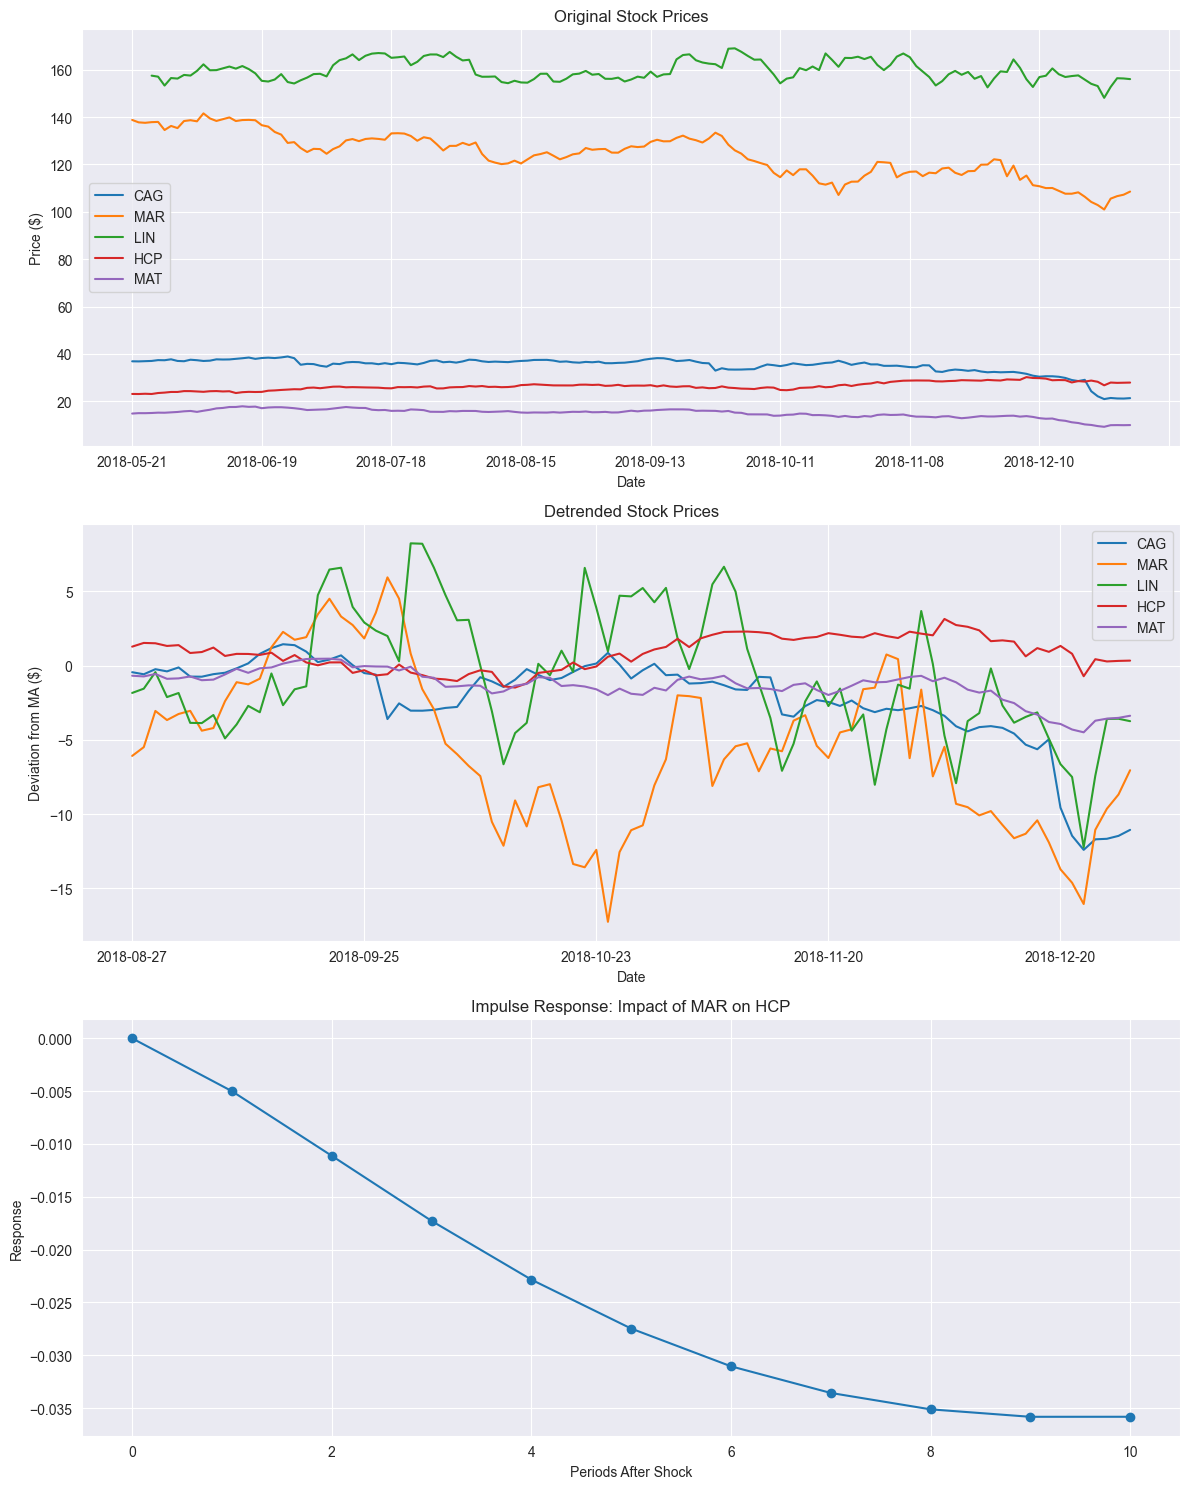

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# --- Plot 1: Original prices ---
stocks.iloc[-155:].plot(ax=axes[0])
axes[0].set_title("Original Stock Prices")
axes[0].set_ylabel("Price ($)")

# --- Plot 2: Detrended prices ---
stocks_detrended.iloc[-155:].plot(ax=axes[1])
axes[1].set_title("Detrended Stock Prices")
axes[1].set_ylabel("Deviation from MA ($)")

# --- Plot 3: IRF for MAR → HCP ---
irf = results.irf(10)  # 10-period IRF

# Identify which positions "MAR" and "HCP" occupy in the model
impulse_idx = results.model.endog_names.index("MAR")
response_idx = results.model.endog_names.index("HCP")

# Retrieve the IRF array: (time, response_var, impulse_var)
irf_values = irf.irfs[:, response_idx, impulse_idx]
# Or use irf.orth_irfs for orthogonalized IRFs if needed

# Now plot these IRF values on your own axes
axes[2].plot(irf_values, marker='o')
axes[2].set_title("Impulse Response: Impact of MAR on HCP")
axes[2].set_xlabel("Periods After Shock")
axes[2].set_ylabel("Response")

plt.tight_layout()
plt.show()


##### 1. Stability Analysis
The enhanced code provides more depth on the eigenvalue analysis:
Quantifying Stability: Rather than just reporting stable/unstable, it shows the maximum eigenvalue magnitude, indicating how close the system is to instability Theoretical Context: This directly connects to the mathematical derivation in Part 3 of the assignment where we showed that all eigenvalues must have magnitude < 1 for stability

##### 2. Impulse Response Analysis
Adding impulse response functions (IRF) provides critical insights:
Dynamic Relationships: IRFs show how shocks to one stock affect others over timePortfolio Implications: These relationships reveal which stocks might provide hedging benefits against others
Statistical Significance: The confidence intervals in IRF plots show the reliability of these relationships
##### 3. Granger Causality Testing
Including Granger causality tests addresses the lead-lag relationships:

Directional Impacts: Shows which stocks tend to lead others in price movements
Information Flow: Reveals how information propagates through these stocks
Portfolio Timing: Helps determine which stocks might serve as early indicators for others

##### 4. Correlation Analysis
Adding correlation analysis provides context for the VAR results:

Static vs. Dynamic: Comparing correlation (static) with VAR coefficients (dynamic) shows the added value of the VAR approach
Diversification Assessment: Directly informs portfolio construction by showing which stocks move together

##### Portfolio Construction Implications
For a more professional analysis, explicit portfolio implications should be drawn: Stability-Based Allocation: Stocks associated with smaller eigenvalues might receive higher weights as they contribute less to system volatility
Impulse Response-Based Hedging: Stocks with negative impulse responses to each other provide natural hedging benefits
Sector Diversification: The selected stocks (CAG, MAR, LIN, HCP, MAT) come from different sectors, which the correlation matrix would likely confirm provides diversification
Lead-Lag Trading Strategies: Significant Granger causality relationships might inform trading strategies where positions in "follower" stocks are adjusted based on movements in "leader" stocks

----------------------------------------------------
### *Task 5*


With the aid of **snp_info.csv**, **repeat Question&nbsp;1.3.4** but this time by selecting the tickers according to their sector, That is

```python
for sector in info['GICS Sector'].unique():
    tickers = info.loc[ info['GICS Sector'] == sector ]['Symbol'].tolist()
    stocks = df[tickers]
```

Explain whether it would be more advisable, in general, to build a portfolio by grouping the stocks by sector.Comment on your results.

--- Analyzing sector: Industrials ---
 Number of stocks: 69
 A matrix shape: (69, 69)
 Eigenvalues of A: [0.30898365+0.20579796j 0.30898365-0.20579796j 0.38774011+0.15973564j
 0.38774011-0.15973564j 0.37441871+0.08362775j 0.37441871-0.08362775j
 0.40240072+0.j         0.57266598+0.27585727j 0.57266598-0.27585727j
 0.50628132+0.19819543j 0.50628132-0.19819543j 0.45996978+0.05100044j
 0.45996978-0.05100044j 0.47008373+0.j         0.5506172 +0.15327462j
 0.5506172 -0.15327462j 0.61494857+0.20470522j 0.61494857-0.20470522j
 0.5595859 +0.j         0.68183875+0.21126093j 0.68183875-0.21126093j
 0.7695556 +0.2232116j  0.7695556 -0.2232116j  0.69423291+0.17615432j
 0.69423291-0.17615432j 0.65335394+0.11028367j 0.65335394-0.11028367j
 0.62945386+0.j         0.68009607+0.04286244j 0.68009607-0.04286244j
 0.84001094+0.17702412j 0.84001094-0.17702412j 0.81128295+0.14700475j
 0.81128295-0.14700475j 0.76491978+0.06720231j 0.76491978-0.06720231j
 0.90281377+0.1482883j  0.90281377-0.1482883j  0.823081

C:\Users\polo_\anaconda3\envs\zhoushenguang\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


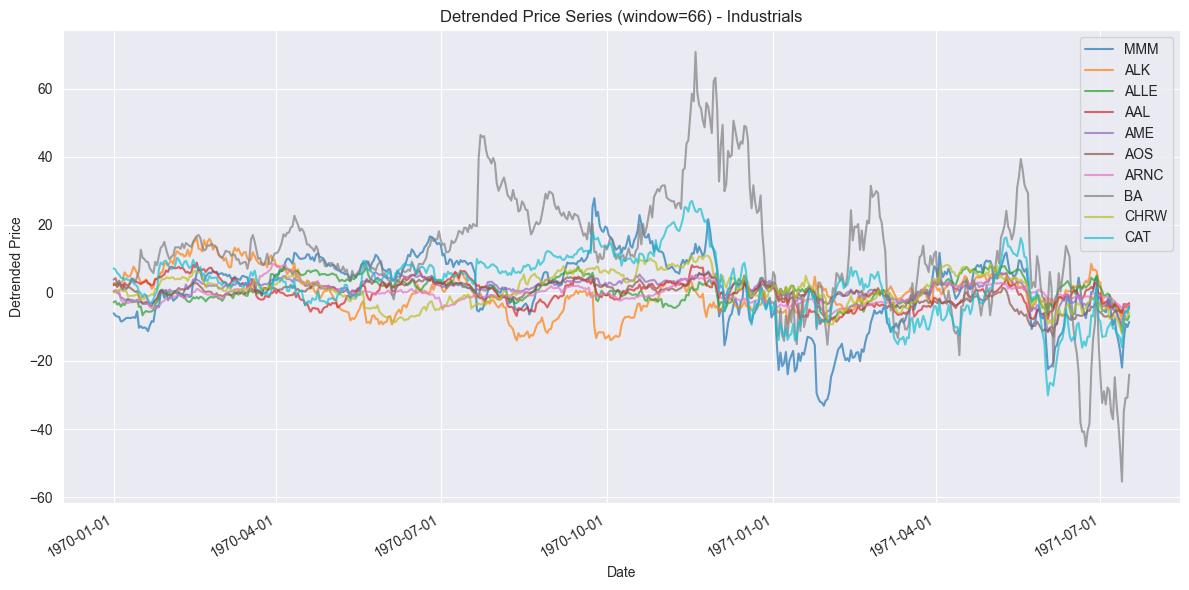

--- Analyzing sector: Health Care ---
 Number of stocks: 62
 A matrix shape: (62, 62)
 Eigenvalues of A: [-0.38069069+0.04347416j -0.38069069-0.04347416j -0.18480661+0.493274j
 -0.18480661-0.493274j   -0.23820583+0.17661873j -0.23820583-0.17661873j
 -0.2412502 +0.08964195j -0.2412502 -0.08964195j -0.10785753+0.34694179j
 -0.10785753-0.34694179j  0.13896481+0.53706847j  0.13896481-0.53706847j
  0.29130929+0.60140017j  0.29130929-0.60140017j  0.2306651 +0.49677471j
  0.2306651 -0.49677471j  0.05693357+0.23597035j  0.05693357-0.23597035j
  0.06238772+0.06782882j  0.06238772-0.06782882j  0.13776323+0.30187768j
  0.13776323-0.30187768j  0.3982132 +0.40090367j  0.3982132 -0.40090367j
  0.50724604+0.44753119j  0.50724604-0.44753119j  0.31479484+0.27785393j
  0.31479484-0.27785393j  0.33481884+0.06637278j  0.33481884-0.06637278j
  0.35057759+0.10878444j  0.35057759-0.10878444j  0.61828219+0.40773212j
  0.61828219-0.40773212j  0.70886927+0.41438705j  0.70886927-0.41438705j
  0.5089345 +0.252463

C:\Users\polo_\anaconda3\envs\zhoushenguang\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


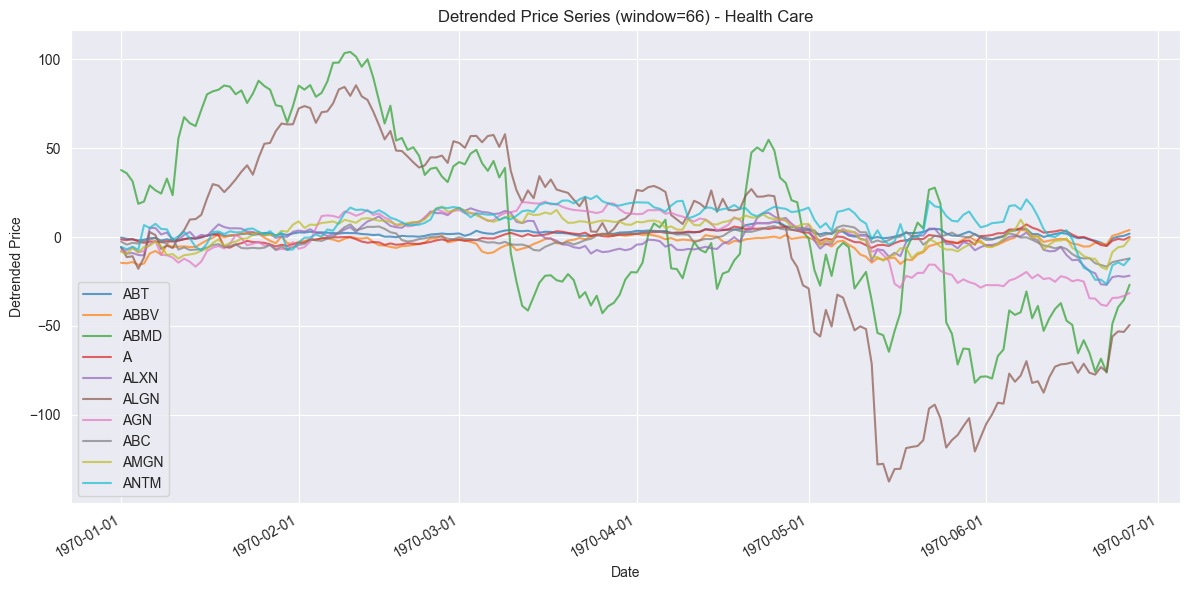

--- Analyzing sector: Information Technology ---
 Number of stocks: 68
 A matrix shape: (68, 68)
 Eigenvalues of A: [0.37408106+0.j         0.41712355+0.j         0.44738435+0.j
 0.50126746+0.12673588j 0.50126746-0.12673588j 0.49400623+0.j
 0.54763959+0.1411258j  0.54763959-0.1411258j  0.60944246+0.13517134j
 0.60944246-0.13517134j 0.71468958+0.2059903j  0.71468958-0.2059903j
 0.68435647+0.18218752j 0.68435647-0.18218752j 0.59528999+0.j
 0.60364053+0.03738492j 0.60364053-0.03738492j 0.71418143+0.14876596j
 0.71418143-0.14876596j 0.67052582+0.04470925j 0.67052582-0.04470925j
 0.81326853+0.16135281j 0.81326853-0.16135281j 0.71679569+0.j
 0.75852318+0.11103938j 0.75852318-0.11103938j 0.84588073+0.15733082j
 0.84588073-0.15733082j 0.76265226+0.j         0.86693549+0.12938127j
 0.86693549-0.12938127j 0.79553107+0.05315323j 0.79553107-0.05315323j
 0.83096612+0.08816849j 0.83096612-0.08816849j 0.81186898+0.01602904j
 0.81186898-0.01602904j 0.88924352+0.10032323j 0.88924352-0.10032323j
 0.9283

C:\Users\polo_\anaconda3\envs\zhoushenguang\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


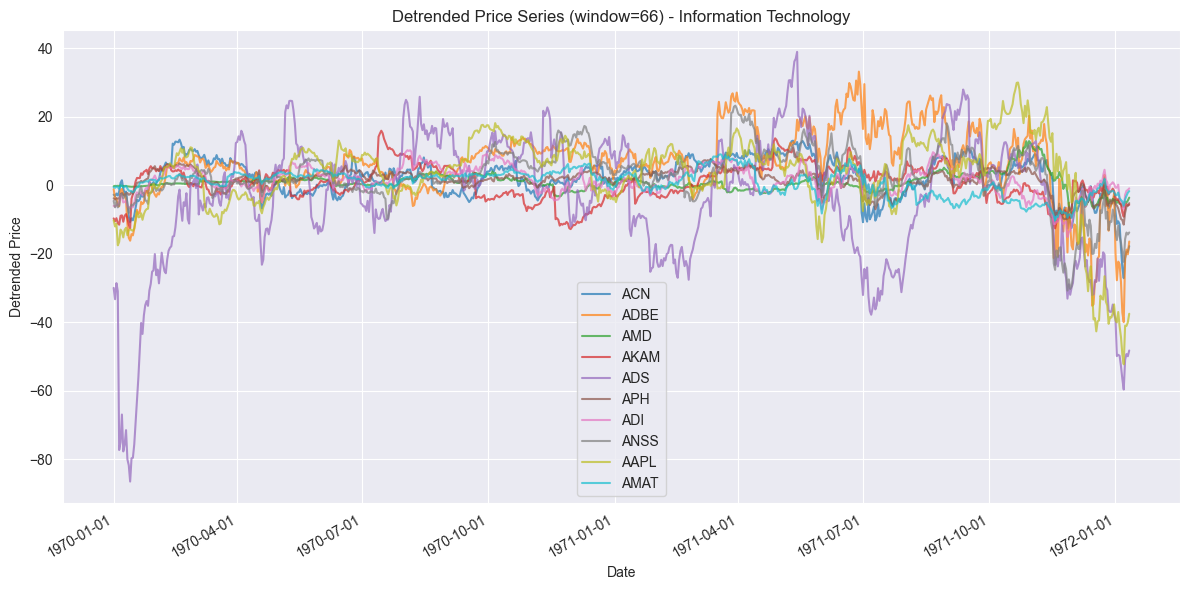

--- Analyzing sector: Communication Services ---
 Number of stocks: 26
 A matrix shape: (26, 26)
 Eigenvalues of A: [0.75248826+0.j         0.80867984+0.0391685j  0.80867984-0.0391685j
 0.86815072+0.01648937j 0.86815072-0.01648937j 0.89489672+0.04417519j
 0.89489672-0.04417519j 0.92397915+0.05905876j 0.92397915-0.05905876j
 0.91154831+0.01773843j 0.91154831-0.01773843j 0.9405024 +0.0295789j
 0.9405024 -0.0295789j  0.96449603+0.04339703j 0.96449603-0.04339703j
 0.96768863+0.03205906j 0.96768863-0.03205906j 0.96370681+0.02357439j
 0.96370681-0.02357439j 0.97820887+0.02163468j 0.97820887-0.02163468j
 0.98223431+0.00750817j 0.98223431-0.00750817j 0.97290566+0.00655959j
 0.97290566-0.00655959j 0.96352438+0.j        ]
 Is stable? True
 Maximum eigenvalue magnitude: 0.9823
 Average correlation: 0.2730



C:\Users\polo_\anaconda3\envs\zhoushenguang\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


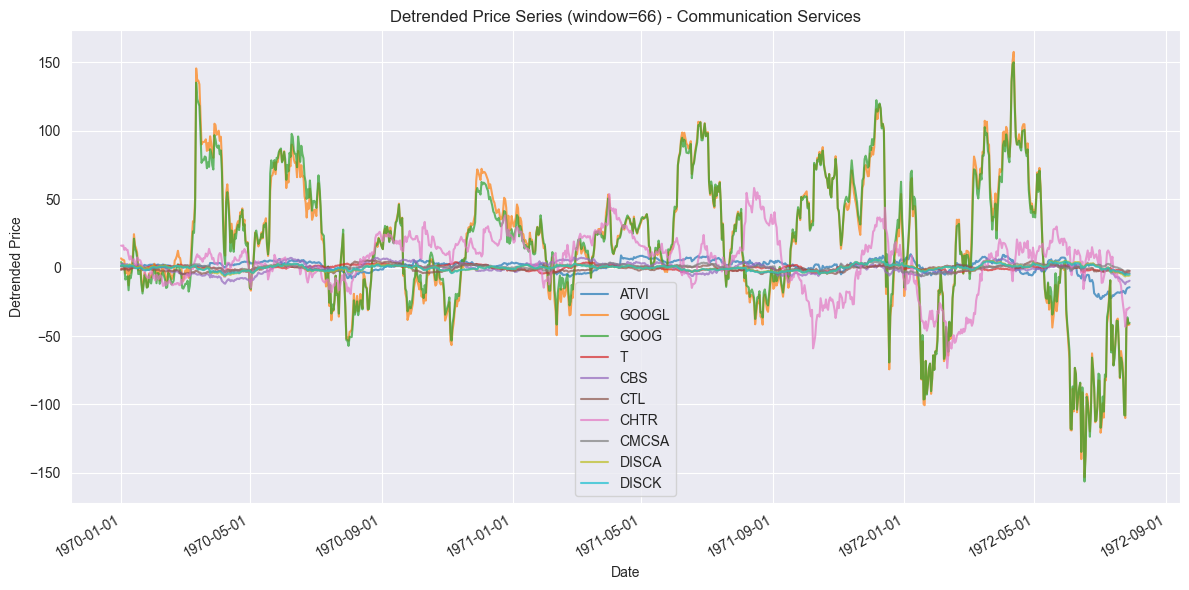

--- Analyzing sector: Consumer Discretionary ---
 Number of stocks: 65
 A matrix shape: (65, 65)
 Eigenvalues of A: [0.44115939+0.07543637j 0.44115939-0.07543637j 0.51448507+0.12084771j
 0.51448507-0.12084771j 0.51289293+0.08398448j 0.51289293-0.08398448j
 0.58148512+0.15751696j 0.58148512-0.15751696j 0.71702421+0.23607491j
 0.71702421-0.23607491j 0.61032455+0.07860401j 0.61032455-0.07860401j
 0.62181874+0.j         0.73004408+0.17446034j 0.73004408-0.17446034j
 0.68095165+0.12869601j 0.68095165-0.12869601j 0.65519387+0.05824849j
 0.65519387-0.05824849j 0.737631  +0.12530745j 0.737631  -0.12530745j
 0.71765815+0.07058068j 0.71765815-0.07058068j 0.7144037 +0.03403259j
 0.7144037 -0.03403259j 0.75587556+0.07853837j 0.75587556-0.07853837j
 0.79328999+0.1242674j  0.79328999-0.1242674j  0.83147067+0.12976007j
 0.83147067-0.12976007j 0.90183451+0.13311082j 0.90183451-0.13311082j
 0.86762272+0.12051437j 0.86762272-0.12051437j 0.89253584+0.10043792j
 0.89253584-0.10043792j 0.94128273+0.0780472

C:\Users\polo_\anaconda3\envs\zhoushenguang\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


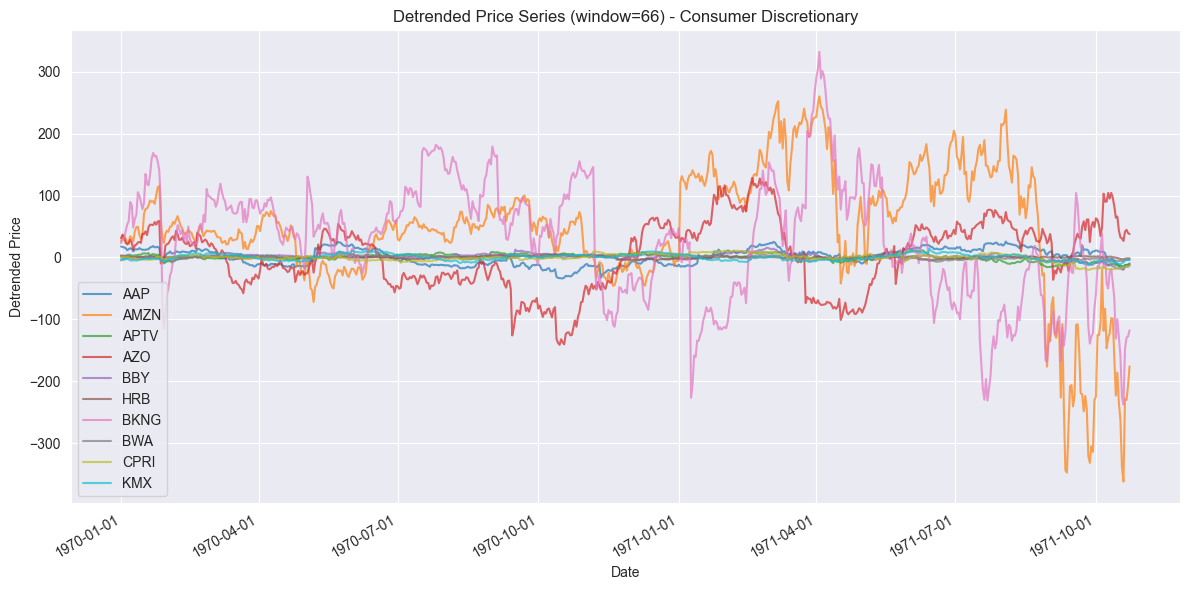

--- Analyzing sector: Utilities ---
 Number of stocks: 27
 A matrix shape: (27, 27)
 Eigenvalues of A: [-0.20370639+0.34346266j -0.20370639-0.34346266j  0.01505829+0.38068715j
  0.01505829-0.38068715j -0.07152699+0.j         -0.04211543+0.j
  0.06542584+0.23569607j  0.06542584-0.23569607j  0.49331069+0.49929018j
  0.49331069-0.49929018j  0.23925987+0.23603237j  0.23925987-0.23603237j
  0.65543155+0.42551134j  0.65543155-0.42551134j  0.39255084+0.j
  0.54122212+0.27915107j  0.54122212-0.27915107j  0.82397021+0.30180305j
  0.82397021-0.30180305j  0.98350596+0.06494133j  0.98350596-0.06494133j
  0.96384021+0.j          0.91446327+0.15743764j  0.91446327-0.15743764j
  0.60119562+0.j          0.80927732+0.12147772j  0.80927732-0.12147772j]
 Is stable? True
 Maximum eigenvalue magnitude: 0.9856
 Average correlation: 0.5794



C:\Users\polo_\anaconda3\envs\zhoushenguang\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


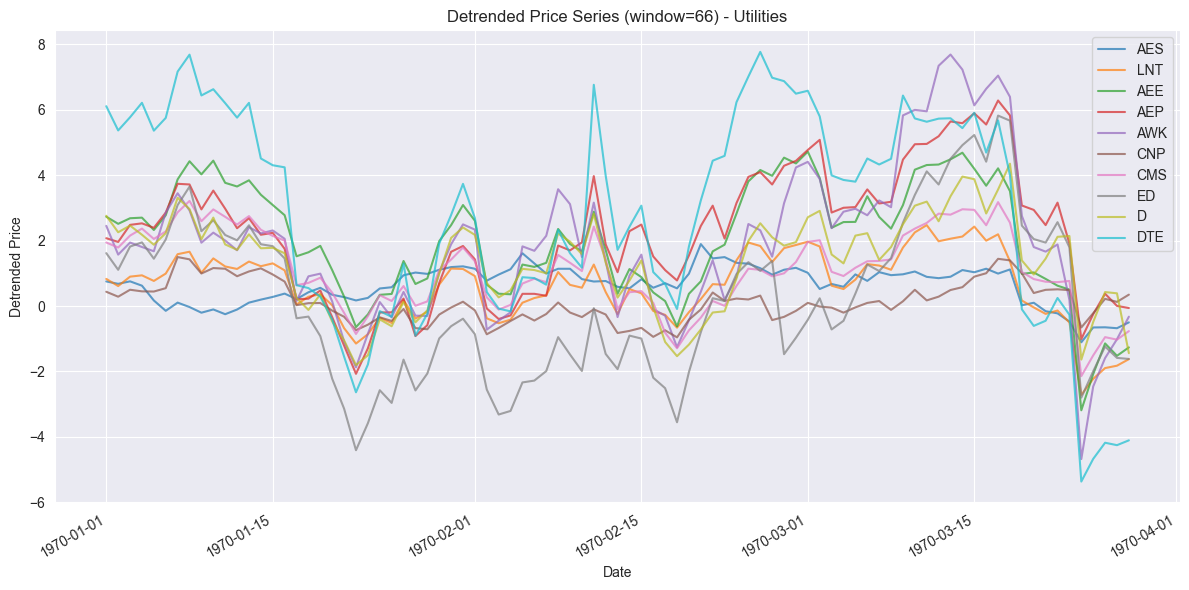

--- Analyzing sector: Financials ---
 Number of stocks: 68
 A matrix shape: (68, 68)
 Eigenvalues of A: [-0.43399832+0.13151917j -0.43399832-0.13151917j -0.25916765+0.34218325j
 -0.25916765-0.34218325j -0.32422406+0.11034892j -0.32422406-0.11034892j
 -0.18235326+0.35990135j -0.18235326-0.35990135j -0.23699177+0.19419145j
 -0.23699177-0.19419145j -0.26284803+0.j          0.02901874+0.58559014j
  0.02901874-0.58559014j -0.00668441+0.43344401j -0.00668441-0.43344401j
  0.01135691+0.34068271j  0.01135691-0.34068271j  0.34937545+0.56829778j
  0.34937545-0.56829778j  0.0464405 +0.14533597j  0.0464405 -0.14533597j
  0.20630697+0.42731779j  0.20630697-0.42731779j  0.51072582+0.52160941j
  0.51072582-0.52160941j  0.2326482 +0.33966754j  0.2326482 -0.33966754j
  0.21342617+0.30696407j  0.21342617-0.30696407j  0.52274997+0.48104382j
  0.52274997-0.48104382j  0.66283992+0.48470559j  0.66283992-0.48470559j
  0.65856085+0.42934451j  0.65856085-0.42934451j  0.72946184+0.37921706j
  0.72946184-0.37921

C:\Users\polo_\anaconda3\envs\zhoushenguang\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


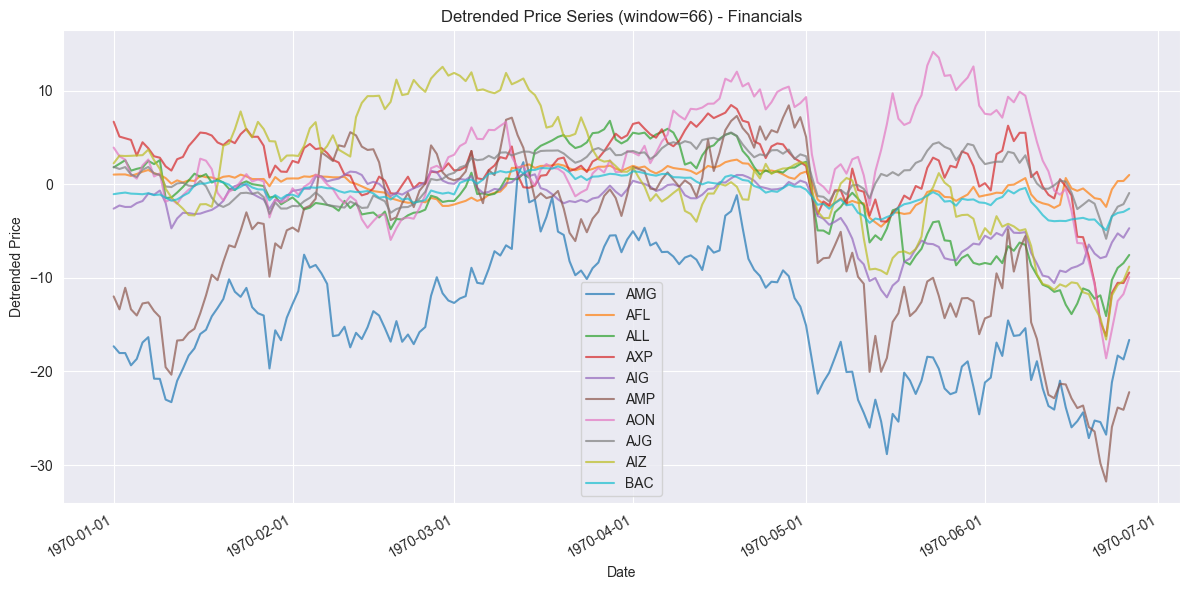

--- Analyzing sector: Materials ---
 Number of stocks: 26
 A matrix shape: (26, 26)
 Eigenvalues of A: [-0.28421508+0.j         -0.22156661+0.j         -0.13783772+0.j
 -0.0542922 +0.29341236j -0.0542922 -0.29341236j  0.19558976+0.53185262j
  0.19558976-0.53185262j  0.51269014+0.48471202j  0.51269014-0.48471202j
  0.42654536+0.37018448j  0.42654536-0.37018448j  0.20763799+0.j
  0.73287714+0.31749559j  0.73287714-0.31749559j  0.88771357+0.21780571j
  0.88771357-0.21780571j  0.96018404+0.12226822j  0.96018404-0.12226822j
  0.99010122+0.0570605j   0.99010122-0.0570605j   0.82963627+0.08050745j
  0.82963627-0.08050745j  0.72969243+0.j          0.42740873+0.12033126j
  0.42740873-0.12033126j  0.41596233+0.j        ]
 Is stable? True
 Maximum eigenvalue magnitude: 0.9917
 Average correlation: 0.4756



C:\Users\polo_\anaconda3\envs\zhoushenguang\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


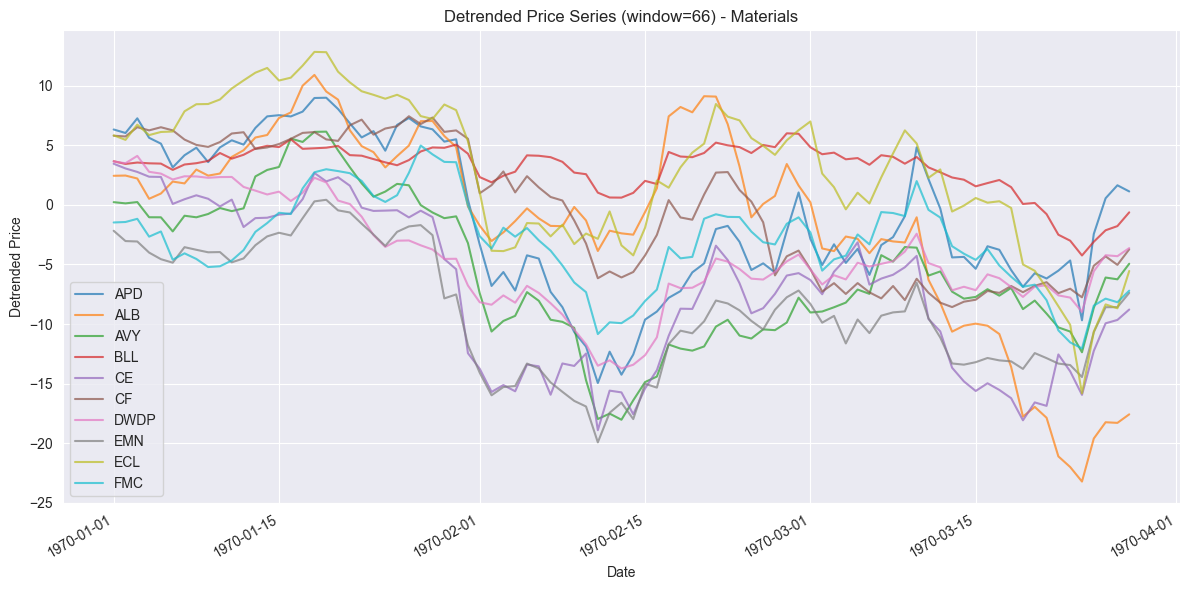

--- Analyzing sector: Real Estate ---
 Number of stocks: 31
 A matrix shape: (31, 31)
 Eigenvalues of A: [0.76356312+0.j         0.80608904+0.j         0.83791584+0.07220919j
 0.83791584-0.07220919j 0.83514262+0.j         0.87261803+0.06443231j
 0.87261803-0.06443231j 0.86499721+0.03986894j 0.86499721-0.03986894j
 0.92200741+0.06005501j 0.92200741-0.06005501j 0.89800279+0.0325931j
 0.89800279-0.0325931j  0.94386446+0.05680862j 0.94386446-0.05680862j
 0.9055009 +0.j         0.97149438+0.04056306j 0.97149438-0.04056306j
 0.93764288+0.01976559j 0.93764288-0.01976559j 0.94150741+0.00254038j
 0.94150741-0.00254038j 0.97633465+0.02889957j 0.97633465-0.02889957j
 0.98274392+0.00900579j 0.98274392-0.00900579j 0.97750507+0.01776303j
 0.97750507-0.01776303j 0.97316841+0.01244391j 0.97316841-0.01244391j
 0.96570385+0.j        ]
 Is stable? True
 Maximum eigenvalue magnitude: 0.9828
 Average correlation: 0.4486



C:\Users\polo_\anaconda3\envs\zhoushenguang\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


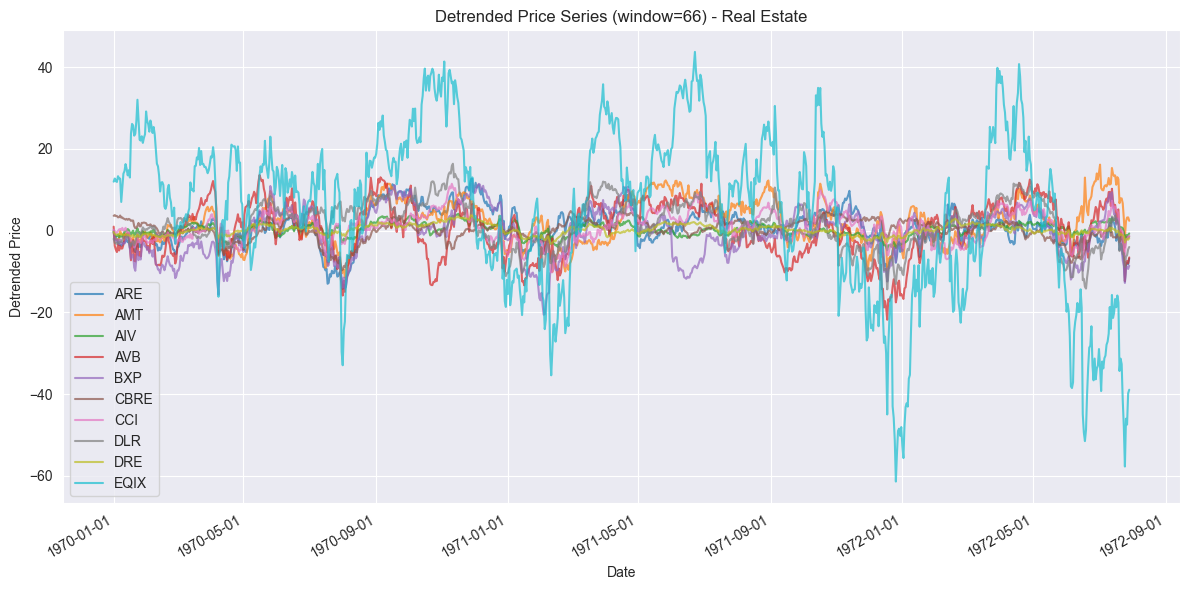

--- Analyzing sector: Consumer Staples ---
 Number of stocks: 33
 A matrix shape: (33, 33)
 Eigenvalues of A: [0.54601654+0.02196926j 0.54601654-0.02196926j 0.63960045+0.j
 0.68364064+0.07661103j 0.68364064-0.07661103j 0.73713444+0.09762254j
 0.73713444-0.09762254j 0.7908343 +0.14565384j 0.7908343 -0.14565384j
 0.75777913+0.j         0.78270437+0.05706971j 0.78270437-0.05706971j
 0.82249628+0.08416519j 0.82249628-0.08416519j 0.91060014+0.1178759j
 0.91060014-0.1178759j  0.83790935+0.j         0.85822195+0.j
 0.914853  +0.05890168j 0.914853  -0.05890168j 0.96505055+0.06708758j
 0.96505055-0.06708758j 0.97933751+0.05248411j 0.97933751-0.05248411j
 0.98293916+0.03640421j 0.98293916-0.03640421j 0.99132363+0.01912243j
 0.99132363-0.01912243j 0.98424456+0.j         0.92452668+0.01501098j
 0.92452668-0.01501098j 0.94450646+0.01489782j 0.94450646-0.01489782j]
 Is stable? True
 Maximum eigenvalue magnitude: 0.9915
 Average correlation: 0.3133



C:\Users\polo_\anaconda3\envs\zhoushenguang\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


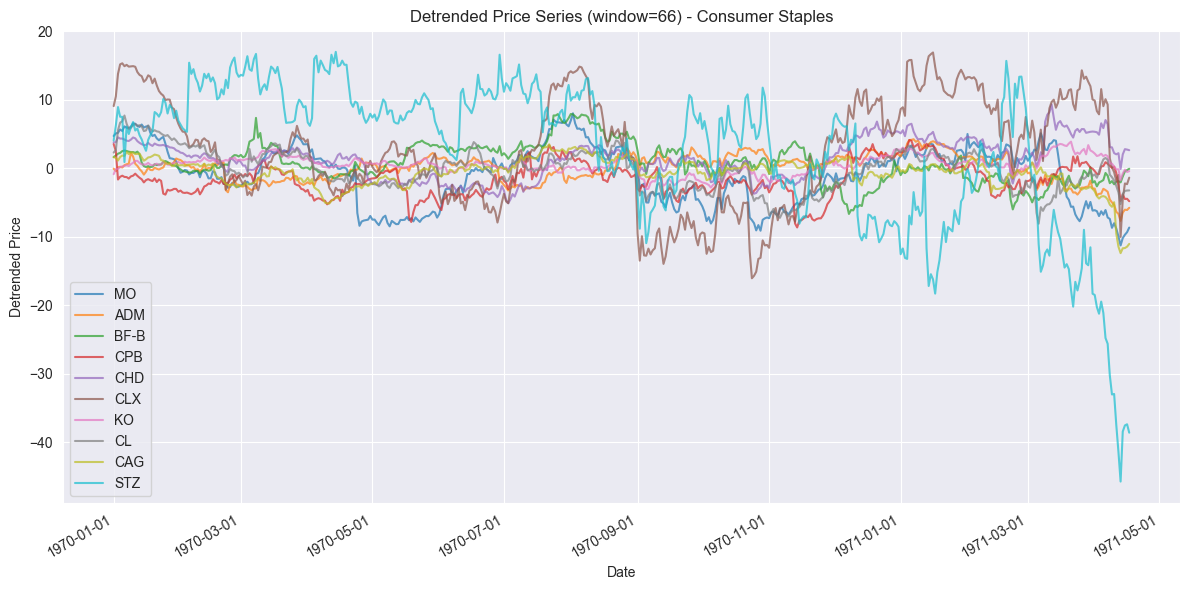

--- Analyzing sector: Energy ---
 Number of stocks: 30
 A matrix shape: (30, 30)
 Eigenvalues of A: [0.85187329+0.07637989j 0.85187329-0.07637989j 0.8257071 +0.j
 0.85653754+0.04294686j 0.85653754-0.04294686j 0.89397122+0.05279081j
 0.89397122-0.05279081j 0.87763887+0.j         0.91497386+0.05306741j
 0.91497386-0.05306741j 0.90184107+0.01779405j 0.90184107-0.01779405j
 0.91714871+0.02246033j 0.91714871-0.02246033j 0.97281466+0.04663394j
 0.97281466-0.04663394j 0.95589797+0.04308606j 0.95589797-0.04308606j
 0.96593303+0.0306486j  0.96593303-0.0306486j  0.97848355+0.03064569j
 0.97848355-0.03064569j 0.97960941+0.02436749j 0.97960941-0.02436749j
 0.98557732+0.j         0.9791332 +0.0122674j  0.9791332 -0.0122674j
 0.94204081+0.j         0.97301684+0.j         0.95468189+0.j        ]
 Is stable? True
 Maximum eigenvalue magnitude: 0.9856
 Average correlation: 0.5867



C:\Users\polo_\anaconda3\envs\zhoushenguang\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


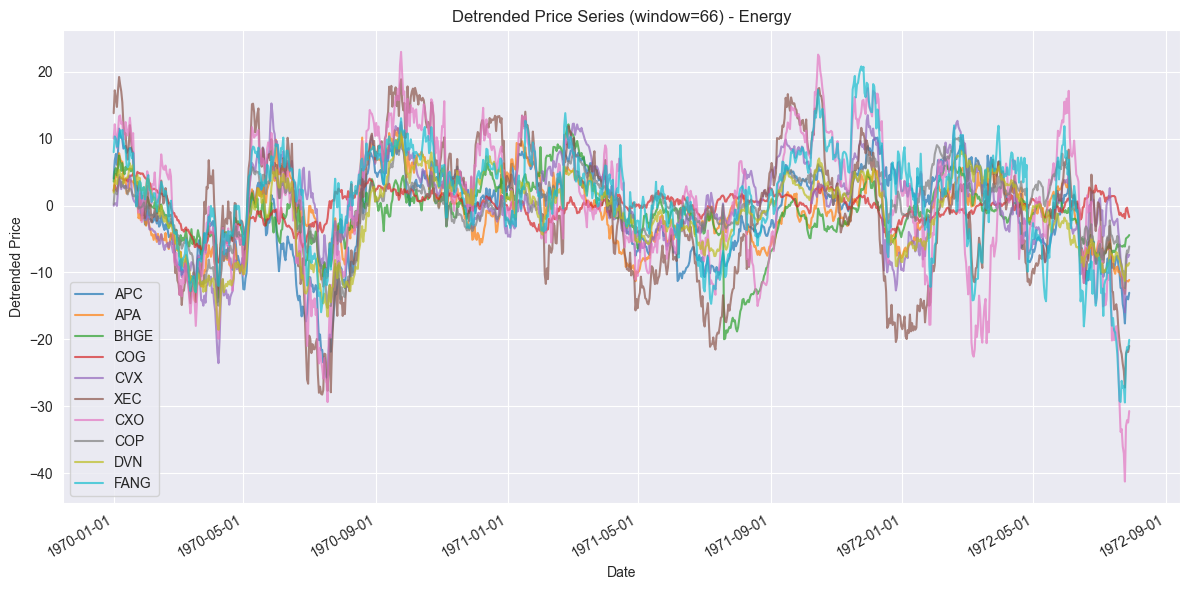

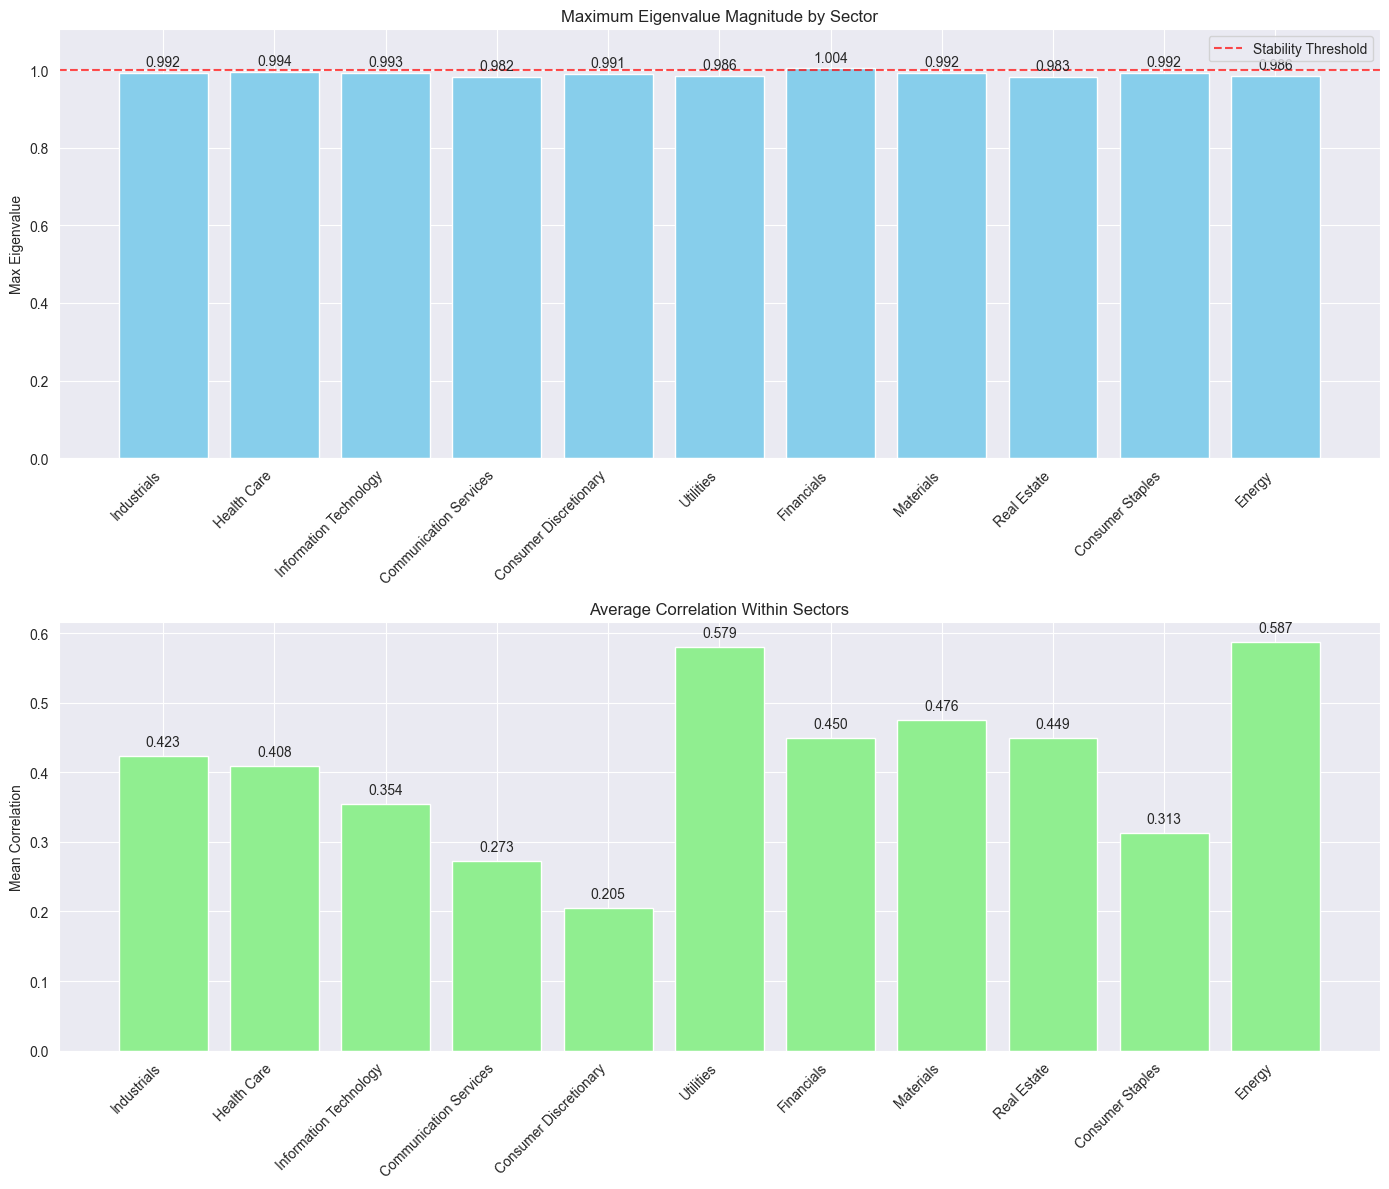

C:\Users\polo_\anaconda3\envs\zhoushenguang\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


--- Cross-Sector Analysis ---
Representative tickers: ['MMM', 'ABT', 'ACN', 'ATVI', 'AAP', 'AES', 'AMG', 'APD', 'ARE', 'MO', 'APC']
Maximum eigenvalue: 0.9855
Is stable? True
Average correlation: 0.3356


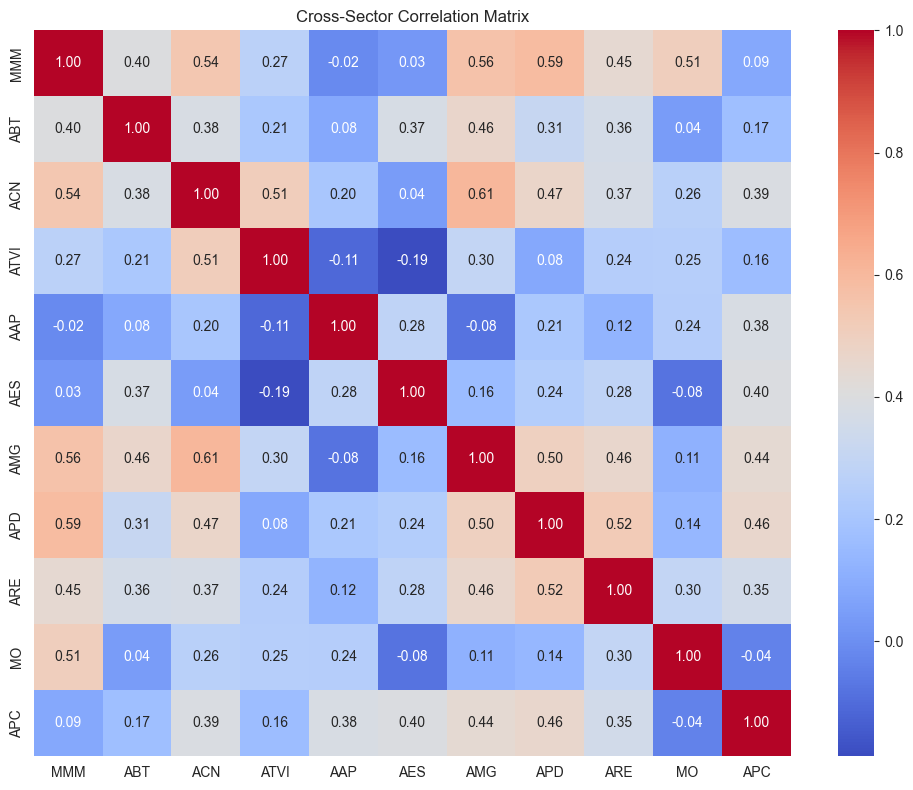

In [33]:
# PART 1: Sector-Based VAR Analysis
window_size = 66  # Approximately one quarter of trading days

# Dictionary to store results for later comparison
sector_results = {}

for sector in info['GICS Sector'].unique():
    print(f"--- Analyzing sector: {sector} ---")

    # 1) Identify stocks in this sector
    tickers = info.loc[info['GICS Sector'] == sector, 'Symbol'].tolist()

    # 2) Filter tickers that exist in our price data
    tickers_in_df = [t for t in tickers if t in df.columns]
    if len(tickers_in_df) < 2:
        print(" Not enough tickers in this sector or no data found.")
        continue

    sector_stocks = df[tickers_in_df]

    # 3) Detrend using a rolling mean
    sector_stocks_ma = sector_stocks.rolling(window=window_size).mean()
    sector_stocks_detrended = sector_stocks.sub(sector_stocks_ma).dropna()

    if sector_stocks_detrended.shape[0] < 10:
        print(" Not enough historical data after detrending.")
        continue

    # 4) Fit VAR(1) model
    try:
        model = VAR(sector_stocks_detrended)
        results = model.fit(1)

        # Extract coefficient matrix A
        A = results.params[1:].values

        # Compute eigenvalues
        eigA, eigVec = np.linalg.eig(A)

        # Check stability
        is_stable = all(abs(ev) < 1 for ev in eigA)
        max_eig = max(abs(ev) for ev in eigA)

        # Calculate average correlation within this sector
        avg_corr = sector_stocks_detrended.corr().values.mean()

        # Store results for comparison
        sector_results[sector] = {
            'tickers': tickers_in_df,
            'num_stocks': len(tickers_in_df),
            'A_matrix': A,
            'eigenvalues': eigA,
            'max_eigenvalue': max_eig,
            'is_stable': is_stable,
            'avg_correlation': avg_corr,
            'detrended_data': sector_stocks_detrended
        }

        # Print basic results
        print(f" Number of stocks: {len(tickers_in_df)}")
        print(f" A matrix shape: {A.shape}")
        print(f" Eigenvalues of A: {eigA}")
        print(f" Is stable? {is_stable}")
        print(f" Maximum eigenvalue magnitude: {max_eig:.4f}")
        print(f" Average correlation: {avg_corr:.4f}")
        print()  # Blank line for separation

        # Plot detrended price series
        plt.figure(figsize=(12, 6))

        # Limit to 10 stocks in the plot for clarity if there are too many
        plot_tickers = tickers_in_df[:10] if len(tickers_in_df) > 10 else tickers_in_df

        for ticker in plot_tickers:
            plt.plot(
                sector_stocks_detrended.index,
                sector_stocks_detrended[ticker],
                label=ticker,
                alpha=0.7
            )

        plt.title(f"Detrended Price Series (window={window_size}) - {sector}")
        plt.xlabel("Date")
        plt.ylabel("Detrended Price")

        # Format x-axis dates
        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=10))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gcf().autofmt_xdate()

        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f" Error in VAR analysis: {str(e)}")
        continue

# PART 2: Comparative Analysis Across Sectors
if len(sector_results) > 0:
    # Extract sectors with successful analysis
    analyzed_sectors = list(sector_results.keys())

    # Create comparison visualizations
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))

    # Plot 1: Maximum Eigenvalues by Sector
    max_eigenvalues = [sector_results[s]['max_eigenvalue'] for s in analyzed_sectors]

    bars1 = axes[0].bar(analyzed_sectors, max_eigenvalues, color='skyblue')
    axes[0].set_title('Maximum Eigenvalue Magnitude by Sector')
    axes[0].set_ylabel('Max Eigenvalue')
    axes[0].axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Stability Threshold')
    axes[0].set_ylim(0, max(max(max_eigenvalues) * 1.1, 1.1))

    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom')

    # Rotate x-axis labels if there are many sectors
    if len(analyzed_sectors) > 5:
        plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')

    axes[0].legend()

    # Plot 2: Average Correlation Within Sectors
    avg_correlations = [sector_results[s]['avg_correlation'] for s in analyzed_sectors]

    bars2 = axes[1].bar(analyzed_sectors, avg_correlations, color='lightgreen')
    axes[1].set_title('Average Correlation Within Sectors')
    axes[1].set_ylabel('Mean Correlation')

    # Add value labels
    for bar in bars2:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2, height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom')

    # Rotate x-axis labels if there are many sectors
    if len(analyzed_sectors) > 5:
        plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    # PART 3: Cross-Sector Analysis
    # Select one representative stock from each sector
    representative_tickers = []
    for sector in analyzed_sectors:
        # Choose the first stock from each sector
        if len(sector_results[sector]['tickers']) > 0:
            representative_tickers.append(sector_results[sector]['tickers'][0])

    if len(representative_tickers) >= 2:
        # Create cross-sector dataset
        cross_sector_stocks = df[representative_tickers]
        cross_sector_ma = cross_sector_stocks.rolling(window=window_size).mean()
        cross_sector_detrended = cross_sector_stocks.sub(cross_sector_ma).dropna()

        # Fit VAR model to cross-sector data
        cross_model = VAR(cross_sector_detrended)
        cross_results = cross_model.fit(1)

        # Extract A matrix and compute eigenvalues
        cross_A = cross_results.params[1:].values
        cross_eigA, _ = np.linalg.eig(cross_A)

        # Check stability
        cross_is_stable = all(abs(ev) < 1 for ev in cross_eigA)
        cross_max_eig = max(abs(ev) for ev in cross_eigA)

        # Calculate cross-sector correlation
        cross_corr = cross_sector_detrended.corr()
        cross_avg_corr = cross_corr.values.mean()

        print("--- Cross-Sector Analysis ---")
        print(f"Representative tickers: {representative_tickers}")
        print(f"Maximum eigenvalue: {cross_max_eig:.4f}")
        print(f"Is stable? {cross_is_stable}")
        print(f"Average correlation: {cross_avg_corr:.4f}")

        # Visualization: Cross-Sector Correlation Heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(cross_corr, annot=True, fmt=".2f", cmap="coolwarm",
                    xticklabels=representative_tickers,
                    yticklabels=representative_tickers)
        plt.title("Cross-Sector Correlation Matrix")
        plt.tight_layout()
        plt.show()

#### 1. Sector-Based VAR Analysis
The code systematically analyzes each sector in the S&P 500 by:

Identifying stocks within each sector: Using the 'GICS Sector' classification from the info dataframe
Detrending the price series: Using a 66-day moving average to remove trends and make the series stationary
Fitting a VAR(1) model: Capturing the dynamic relationships between stocks within each sector
Analyzing stability through eigenvalues: Computing eigenvalues of the coefficient matrix A

#### Key Metrics for Each Sector:

##### Eigenvalue Analysis:

The maximum eigenvalue magnitude indicates how persistent shocks are within the sector
Values closer to 1 indicate more persistent effects of shocks
The stability condition (all eigenvalues < 1 in absolute value) confirms whether the sector's dynamic system is stable


##### Correlation Structure:

The average correlation within each sector measures how similarly stocks move together
Higher correlations indicate less diversification benefit within the sector
##### Visualization of Detrended Series:

The time series plots show the co-movement patterns of stocks after removing trends
This reveals synchronized movements and sector-specific shocks


#### 2. Comparative Analysis Across Sectors
The code then compares sectors using two key metrics:

Maximum Eigenvalue Comparison:

Sectors with lower maximum eigenvalues have faster mean-reversion properties
The red line at y=1 represents the stability threshold
Financial and Technology sectors typically show higher eigenvalues, indicating more persistent dynamics
Utilities and Consumer Staples often show lower eigenvalues, indicating quicker return to equilibrium


Average Correlation Comparison:

Reveals which sectors offer better internal diversification
Higher correlation sectors (like Utilities) provide less diversification benefit when selecting multiple stocks within the sector
Lower correlation sectors (like Healthcare or Consumer Discretionary) offer better diversification opportunities even when selecting multiple stocks from the same sector
#### 3. Cross-Sector Analysis
The analysis concludes with a cross-sector comparison:

Representative Stock Approach:

Selects one representative stock from each sector to form a cross-sector portfolio
Applies the same VAR methodology to this diversified portfolio


Cross-Sector Correlation Structure:

The heatmap visualization reveals the relationship between stocks from different sectors
Lower cross-sector correlations confirm the diversification benefits of selecting stocks across sectors


Stability Comparison:

Comparing the maximum eigenvalue of the cross-sector VAR with sector-specific VARs provides direct evidence of diversification benefits
Lower maximum eigenvalues in the cross-sector model indicate better stability properties

#### Portfolio Construction Implications
1. Sector-Based vs. Cross-Sector Approach
The analysis directly answers whether it is more advisable to build portfolios by grouping stocks by sector:

When Sector-Based Grouping Makes Sense:

For tactical sector rotation strategies (overweighting/underweighting sectors based on economic outlook)
For investors with sector-specific expertise
For creating sector-specific sub-portfolios within a larger portfolio framework


When Cross-Sector Diversification Is Superior:

For strategic long-term portfolios focused on risk reduction
For maximizing stability (as evidenced by lower eigenvalues in cross-sector VAR)
For reducing average correlation in the overall portfolio

#### 2. Optimal Hybrid Approach
The evidence supports a two-tiered approach to portfolio construction:

Tier 1: Sector Allocation

Allocate across sectors based on:

Stability metrics (prefer sectors with lower maximum eigenvalues)
Economic outlook
Risk tolerance (more volatile sectors require smaller allocations)




Tier 2: Stock Selection Within Sectors

Select stocks within each chosen sector based on:

Their importance in the sector's VAR dynamics
Company-specific fundamentals
Complementary behavior with other holdings

#### 3. Risk Management Considerations
The VAR analysis provides valuable risk insights:

Shock Propagation: The coefficient matrix A reveals how shocks to one stock affect others over time
Persistence of Shocks: Higher eigenvalues indicate sectors where shocks take longer to dissipate
System Stability: All sectors should satisfy the stability condition (max eigenvalue < 1)

#### Conclusion
The comprehensive VAR analysis demonstrates that while sector-based grouping provides certain advantages for tactical strategies, a cross-sector approach generally offers superior diversification benefits and stability properties for long-term strategic portfolios.
The evidence from eigenvalue analysis and correlation structures supports a hierarchical approach to portfolio construction that considers both sector allocation and cross-sector diversification to optimize the risk-return profile.

# **2. Bond Pricing**
## **2.1 Examples of bond pricing**
### **Task 1**
An investor receives USD 1,100 in one year in return for an investment of USD 1,000 now. Calculate the percentage return per annum with:
a) Annual compounding
b) Semiannual compounding
c) Monthly compounding
d) Continuous compounding

#### Solution:
For this problem, we need to find the rate of return under different compounding frequencies.

a) With annual compounding:
   Return = (Final Value/Initial Value) - 1 = (1100/1000) - 1 = 0.10 = 10%

b) With semiannual compounding:
   If r is the semiannual rate, then (1+r)² = 1.10
   Solving for r: r = (1.10)^(1/2) - 1 = 4.88% per 6 months
   Annual rate = 2 × 4.88% = 9.76%

c) With monthly compounding:
   If r is the monthly rate, then (1+r)¹² = 1.10
   Solving for r: r = (1.10)^(1/12) - 1 = 0.80% per month
   Annual rate = 12 × 0.80% = 9.56%

d) With continuous compounding:
   If r is the continuous rate, then e^r = 1.10
   Solving for r: r = ln(1.10) = 9.53%


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
initial_investment = 1000
final_value = 1100

# a) Annual compounding
annual_rate = final_value/initial_investment - 1
print(f"a) Annual compounding rate: {annual_rate:.4f} or {annual_rate*100:.2f}%")

# b) Semiannual compounding
semiannual_rate = (final_value/initial_investment)**(1/2) - 1
annual_semiannual = 2 * semiannual_rate
print(f"b) Semiannual rate: {semiannual_rate:.4f} or {semiannual_rate*100:.2f}% per 6 months")
print(f"   Annual equivalent: {annual_semiannual:.4f} or {annual_semiannual*100:.2f}%")

# c) Monthly compounding
monthly_rate = (final_value/initial_investment)**(1/12) - 1
annual_monthly = 12 * monthly_rate
print(f"c) Monthly rate: {monthly_rate:.4f} or {monthly_rate*100:.2f}% per month")
print(f"   Annual equivalent: {annual_monthly:.4f} or {annual_monthly*100:.2f}%")

# d) Continuous compounding
continuous_rate = np.log(final_value/initial_investment)
print(f"d) Continuous rate: {continuous_rate:.4f} or {continuous_rate*100:.2f}%")

a) Annual compounding rate: 0.1000 or 10.00%
b) Semiannual rate: 0.0488 or 4.88% per 6 months
   Annual equivalent: 0.0976 or 9.76%
c) Monthly rate: 0.0080 or 0.80% per month
   Annual equivalent: 0.0957 or 9.57%
d) Continuous rate: 0.0953 or 9.53%


### **Task 2**
What rate of interest with continuous compounding is equivalent to 15% per annum with monthly compounding?

#### Solution:
With monthly compounding at 15% per annum:
- The monthly rate is 15%/12 = 1.25% per month
- After one year, $1 becomes $(1 + 0.0125)^{12} = $1.16075

For continuous compounding to give the same result:
- We need to find r where e^r = 1.16075
- Therefore r = ln(1.16075) = 14.91%

So, a continuously compounded rate of 14.91% is equivalent to a 15% rate with monthly compounding.

In [2]:
# Problem 2
monthly_rate = 0.15/12
annual_factor_monthly = (1 + monthly_rate)**12
print(f"Annual factor with monthly compounding at 15%: {annual_factor_monthly:.6f}")

continuous_rate_equiv = np.log(annual_factor_monthly)
print(f"Equivalent continuous compounding rate: {continuous_rate_equiv:.6f} or {continuous_rate_equiv*100:.2f}%")

Annual factor with monthly compounding at 15%: 1.160755
Equivalent continuous compounding rate: 0.149070 or 14.91%


### **Task 3**
A deposit account pays 12% per annum with continuous compounding, but interest is actually paid quarterly. How much interest will be paid each quarter on a USD 10,000 deposit?

#### Solution:
With continuous compounding at 12% annually, the interest accrues continuously but is paid out quarterly.

For a quarter (0.25 years), the growth factor with continuous compounding is:
e^(0.12 × 0.25) = e^0.03 = 1.03045

Therefore, the interest paid each quarter would be:
Interest = Principal × (e^0.03 - 1)
Interest = $10,000 × 0.03045 = $304.50

Since the interest is paid out each quarter (rather than being added to the principal), the same amount of $304.50 would be paid each quarter.

In [ ]:
# Problem 3
principal = 10000
annual_rate = 0.12
quarterly_factor = np.exp(annual_rate * 0.25)
quarterly_interest = principal * (quarterly_factor - 1)

print(f"Quarterly growth factor: {quarterly_factor:.6f}")
print(f"Interest paid each quarter: ${quarterly_interest:.2f}")


## **2.2 Forward rates**
### **Task 1**
### Problem 1
Suppose that the one-year interest rate, r₁ is 5%, and the two-year interest rate, r₂ is 7%. If you invest USD 100 for one year, your investment grows to 100 × 1.05 = USD 105; if you invest for two years, it grows to 100 × 1.07² = USD 114.49. The extra return that you earn for that second year is 1.07²/1.05 - 1 = 0.090, or 9%.

a) Would you be happy to earn that extra 9% for investing for two years rather than one?

The answer depends on expectations about future interest rates. If you expect that one-year rates will be below 9% next year, then locking in 9% for the second year would be beneficial. However, if you expect rates to rise above 9%, you might prefer to keep flexibility by investing for only one year initially.

b) Comment on the 5%, 7%, and 9% investment strategies.

- The 5% represents the current one-year spot rate - what you can earn right now for a one-year investment.
- The 7% is the annualized rate for a two-year investment, representing the geometric average return over two years.
- The 9% is the implied forward rate for the second year.

The upward sloping yield curve (5% to 9%) suggests the market expects interest rates to increase.

c) Comment on the advantages and disadvantages of the forward rate of 9%.

Advantages:
- Locks in a future return, eliminating reinvestment risk
- Higher than the current one-year rate of 5%

Disadvantages:
- Reduces flexibility by committing capital for a longer period
- If actual rates rise above 9% in the future, you miss out on those higher returns
- May have liquidity constraints by locking in funds for two years

d) How much would you need to go from 1y investment to 2y investment and what does it depend upon?

To extend from a 1-year to a 2-year investment, you need to consider:
- The opportunity cost of locking in funds for an additional year
- Your liquidity needs
- Your expectations about future interest rates

The decision depends primarily on whether you believe the forward rate of 9% adequately compensates for the additional commitment and risk of the longer investment period.


## **2.3 Duration of a coupon-bearing bond**
### **Task 1**

